# =====================================
#  2A - L1 Image as functions
# =====================================

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import clear_output, Image as NoteImage, display
from PIL import Image
from io import BytesIO
import PIL.Image

In [104]:
def red(im):
    return im[:,:,0]
def green(im):
    return im[:,:,1]
def blue(im):
    return im[:,:,2]
def gray(im):
    return cv.cvtColor(im, cv.COLOR_BGR2GRAY)

In [3]:
def plot_row(grayim,index):
    y = grayim[index,:]
    x = np.arange(len(y))
    plt.plot(x,y)
    plt.show()


In [4]:
def plot_3d(img):
    w,h = img.shape
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_subplot(111, projection='3d')
    _x = np.arange(w)
    _y = np.arange(h)
    for x in _x:
        ax1.plot([x]*h,_y,img[x,:])

In [5]:
%matplotlib notebook
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imsave(im,filename,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    PIL.Image.fromarray(im).save(filename, fmt)
def imread(filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [6]:
messi = cv.imread("messi.jpg")
messi = cv.cvtColor(messi, cv.COLOR_BGR2RGB)

In [7]:
ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

Normal


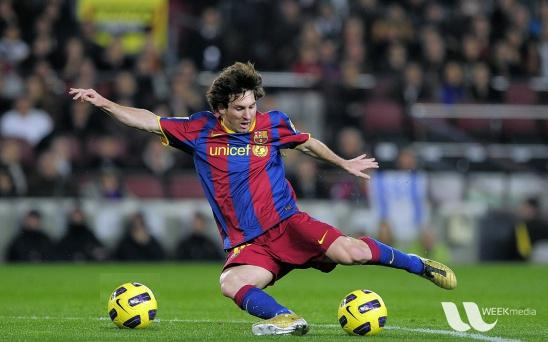

Additave Inverse


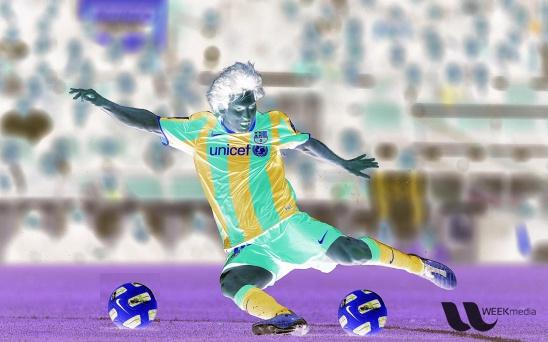

Multiply 0.5


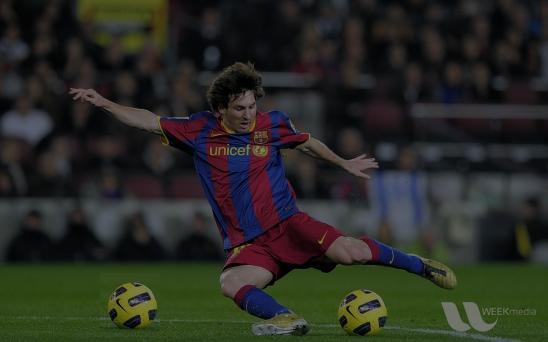

In [8]:
print ("Normal")
imshow(messi)
print ("Additave Inverse")
imshow(255-messi)
print ("Multiply 0.5")
imshow(np.uint8(np.clip(0.5*messi, 0, 255)))

additave inverse


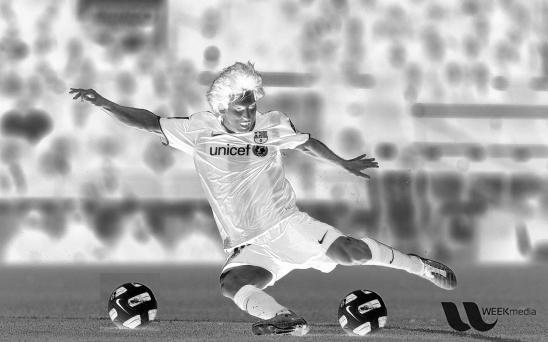

red


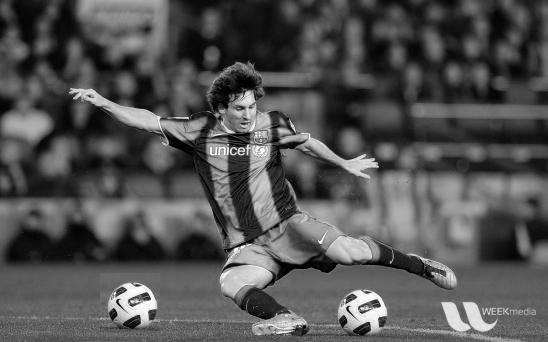

green


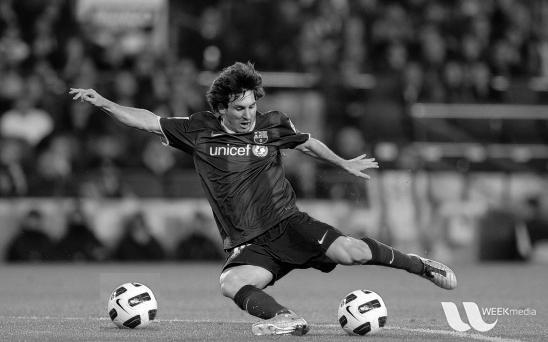

blue


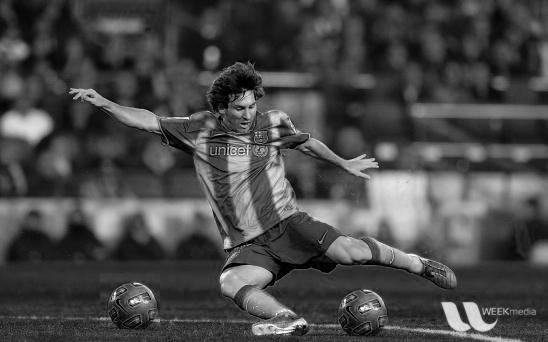

In [9]:
messigreen = green(messi)
messigreen.shape
#plot_row(messigreen,10)
x =  np.array([messigreen[139:140,210:270].flatten()]*40)
print("additave inverse")
imshow(255-messigreen)
print("red")
imshow(red(messi))
print("green")
imshow(green(messi))
print("blue")
imshow(blue(messi))
#plot_3d(messigreen[139:140,210:270])

In [10]:
messi2 = cv.imread("messi2.jpg")
messi2 = cv.cvtColor(messi2, cv.COLOR_BGR2RGB)

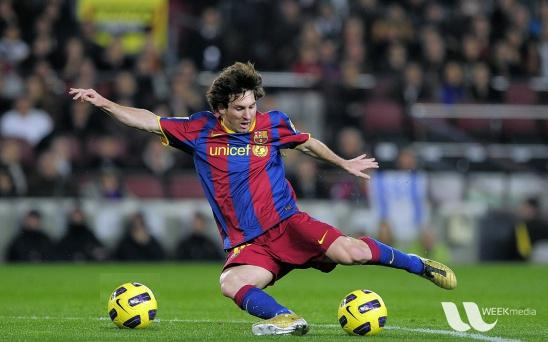

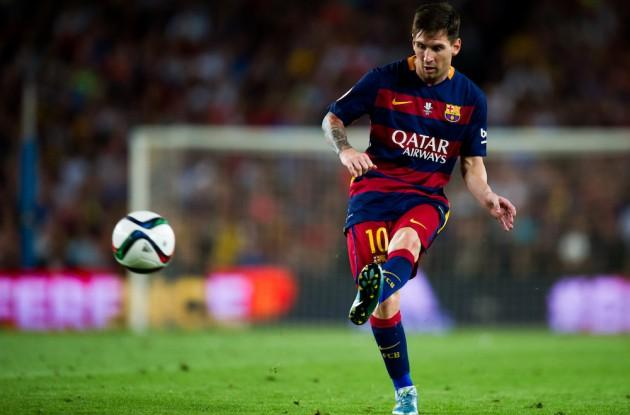

In [11]:
imshow(messi)
imshow(messi2)

In [12]:
def resize(image,size):
    return cv.resize(image, size) 
def multiply(image,factor):
    return np.uint8(np.clip(factor*image, 0, 255))

In [13]:
messi2 = resize(messi2,(messi.shape[1],messi.shape[0]))

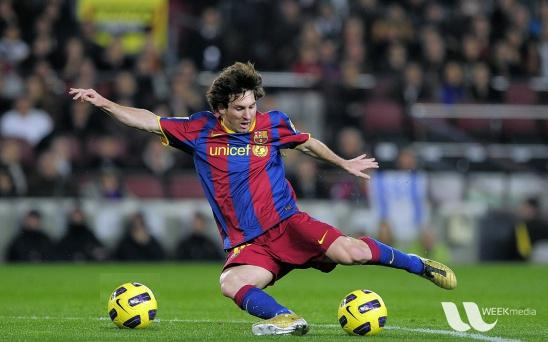

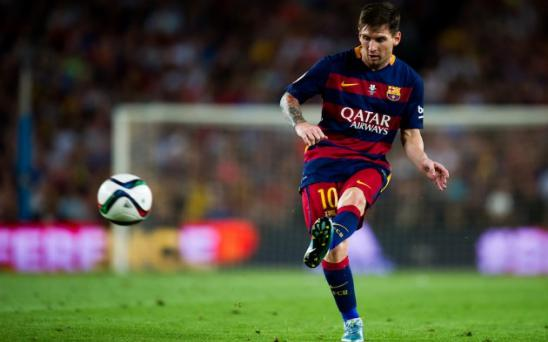

In [14]:
imshow(messi)
imshow(messi2)

Average Image


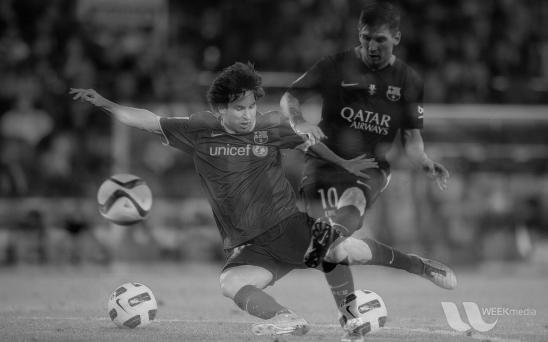

In [15]:
print ("Average Image")
messic = multiply(green(messi),0.5)+multiply(green(messi2),0.5)
imshow(messic)

In [16]:
def blend(img1,img2,factor):
    return multiply(img1,factor)+multiply(img2,1-factor)

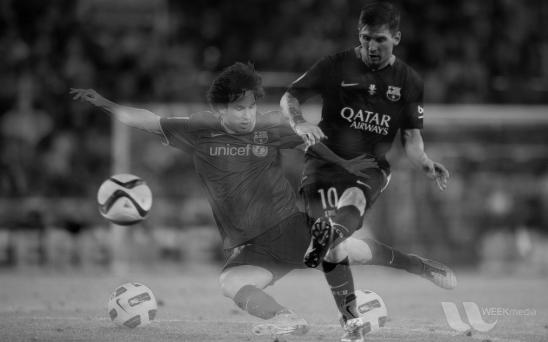

In [17]:
imshow(blend(green(messi),green(messi2),0.35))

### Noise
Noise in Image is another function that is combined with the original function to get a new guess what- function

- **Salt and pepper noise**: random occuences of black and white pixels
- **Impulse noise**: random occurrences of white pixels
- **Gaussian noise**: variations in intensity drawn from a Gaussian normal distribution


In [18]:
def gnoise(img,mu,sigma):
    noise = np.random.normal(mu, sigma, img.shape)
    return np.uint8(img + noise)

Gaussian noise


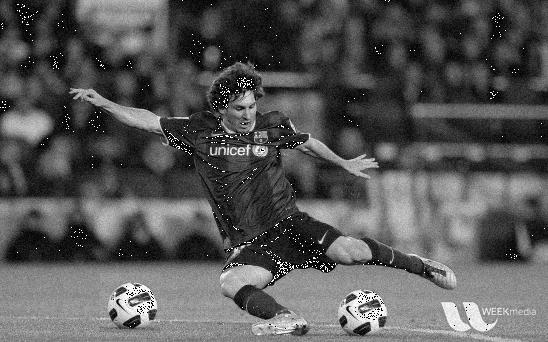

In [19]:
print("Gaussian noise")
gausi = gnoise(green(messi),0,8)
imshow(gausi)

In [20]:
def add_salt_and_pepper(gb, prob):
    '''Adds "Salt & Pepper" noise to an image.
    gb: should be one-channel image with pixels in [0, 1] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return np.uint8(noisy*255)

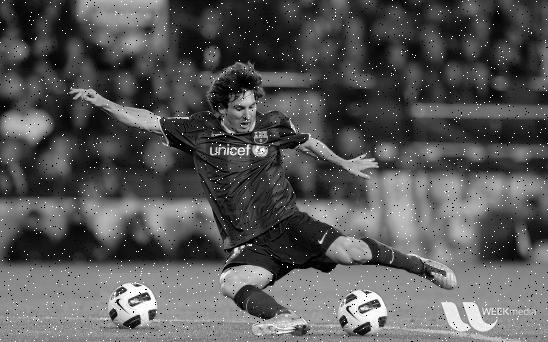

In [21]:
salty = add_salt_and_pepper(green(messi/255.0),0.01)
imshow(salty)

In [22]:
def plot_two(img1,img2,index):
    f, (ax1, ax2) = plt.subplots(1, 2)
    y = img1[index,:]
    x = np.arange(len(y))
    ax1.plot(x,y)
    y = img2[index,:]
    ax2.plot(x, y)
def plot_raw(img1,index):
    f, (ax1) = plt.subplots(1, 1)
    y = img1[index,:]
    x = np.arange(len(y))
    ax1.plot(x,y)

<IPython.core.display.Javascript object>


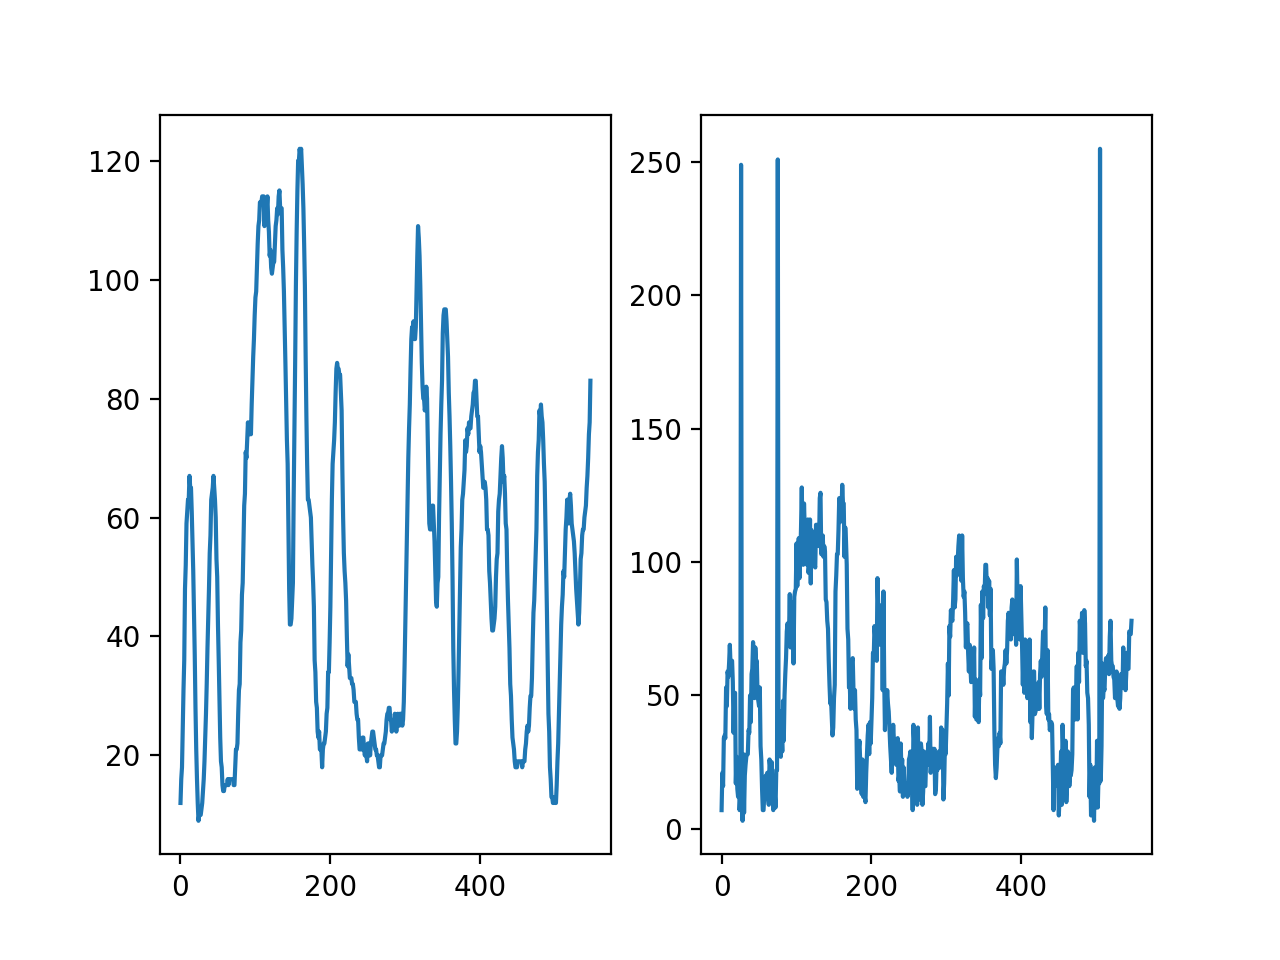

In [23]:
plot_two(green(messi),gausi,30)

### Difference of images

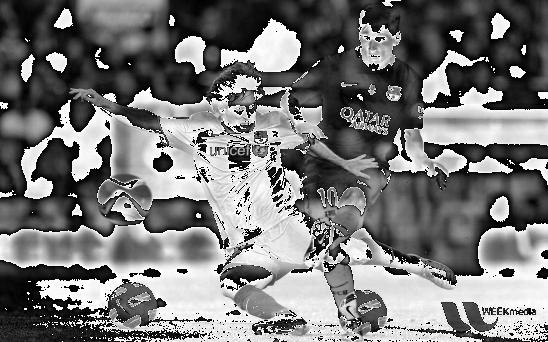

In [24]:
messid = green(messi) - green(messi2)
imshow(messid)

Brighter area shows where the two images differ more

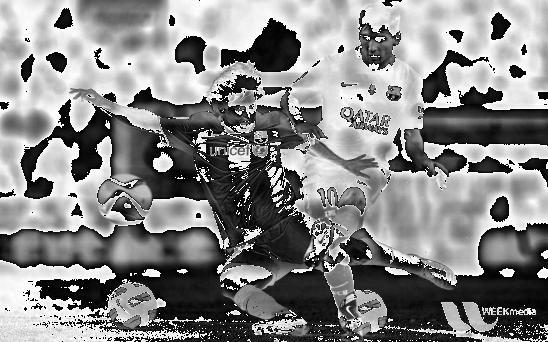

In [25]:
messid =  green(messi2) - green(messi)
imshow(messid)

Oreder matters. But we are interested in the magnitude of the difference not the signed

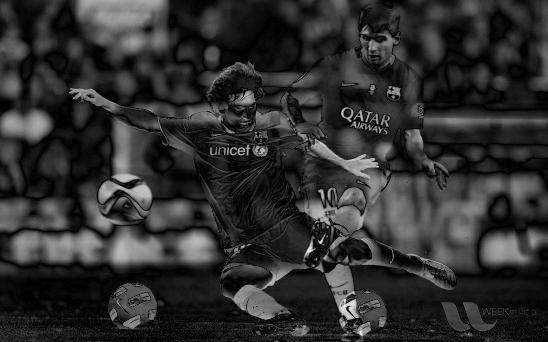

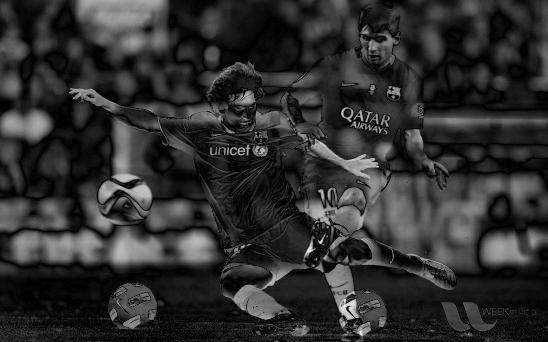

In [26]:
### messid =  abs(green(messi2) - green(messi))
### Te previous will overflow. Instead we use the following
def abs_diff(img1,img2):
    return np.uint8(abs(np.int16(img1)- np.int16(img2)))


messid =  abs_diff(green(messi2),green(messi))
messid2 =  abs_diff(green(messi),green(messi2))
imshow(messid)
imshow(messid2)

In [27]:
%matplotlib inline
def draw_raw(img,index,mag=10):
    fig, ax = plt.subplots()
    #ax.set_axis_off()
    ax.margins(0,0)
    #ax.xaxis.set_major_locator(plt.NullLocator())
    #ax.yaxis.set_major_locator(plt.NullLocator())
    x = np.array([img[index,:]]*mag)
    im = ax.imshow(x,cmap="gray")
    fig.tight_layout()

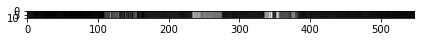

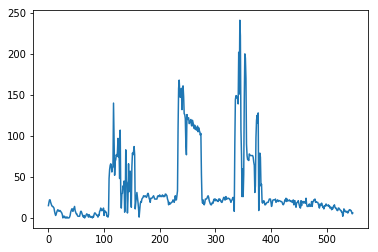

In [28]:
draw_raw(messid,300)
plot_raw(messid,300)

# =====================================
# 2A - L2 Filtering
# =====================================

### Removing noise

Take the average of the pixels around each pixel

**Averaging Assumotions**
1. The true value of pixels are similar to the true value of pixels nearby
2. The noise added to each pixel is done independently

### Weighted Moving Average

- Can add weights to our moving average
- Weights [1,1,1,1,1,]/5

- None-uniform weights [1,4,6,4,1]/16




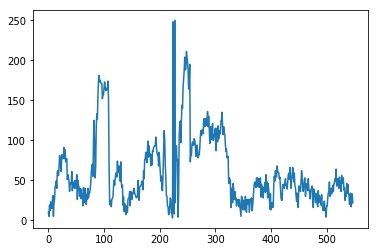

In [29]:
plot_raw(gausi,100)

In [30]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [31]:
raw100 = gausi[100,:]
cleaned = moving_average(raw100,5)

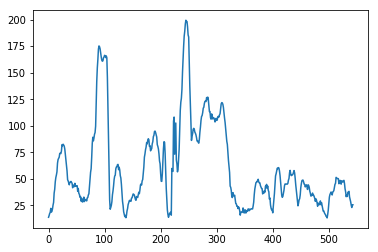

In [32]:
plt.plot(np.arange(len(cleaned)),cleaned)

In [39]:
def weighted_moving_average(a,weights=np.array([1,4,6,4,1])):
    s = sum(weights)
    n = len(weights)
    h = n//2
    ret = [np.dot(a[i-h:i+h+1],weights)//s for i in range(h,len(a)-h)]
    return ret

In [40]:
w_cleaned = weighted_moving_average(raw100)

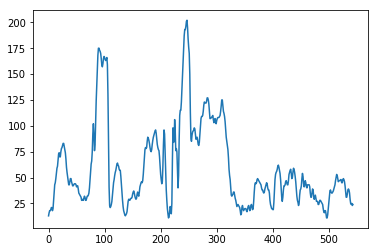

In [41]:
plt.plot(np.arange(len(w_cleaned)),w_cleaned)

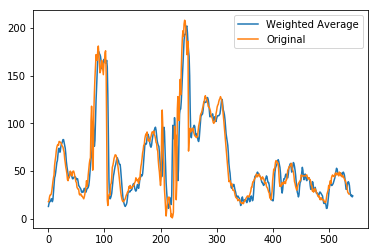

In [42]:
plt.plot(np.arange(len(w_cleaned)),w_cleaned,label="Weighted Average")
#plt.plot(np.arange(len(cleaned[5:-5])),cleaned[5:-5],label="Average")
plt.plot(np.arange(len(green(messi)[100,:][5:-5])),green(messi)[100,:][5:-5],label="Original")
plt.legend()

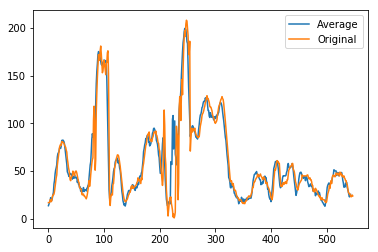

In [43]:
plt.plot(np.arange(len(cleaned)),cleaned,label="Average")
plt.plot(np.arange(len(green(messi)[100,:])),green(messi)[100,:],label="Original")
plt.legend()

### Moving average in 2D

In [47]:
def moving_average_2d(a, n=3) :
    w,h = a.shape
    m = n*n
    half = n//2
    x = np.copy(a)
    for i in range(half,w-half):
        for j in range(half,h-half):
            s = round(sum(a[i-half:i+half+1,j-half:j+half+1].flatten()))
            x[i,j] = s/float(m)
    return x

In [48]:
cleaned = moving_average_2d(gausi,3)

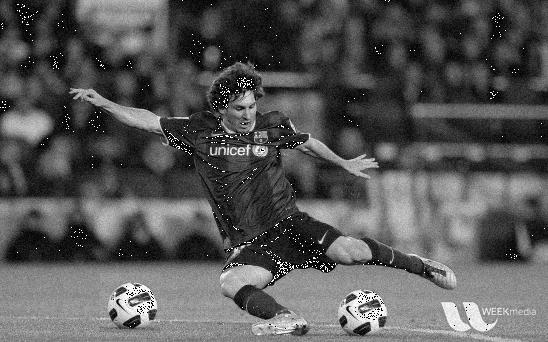

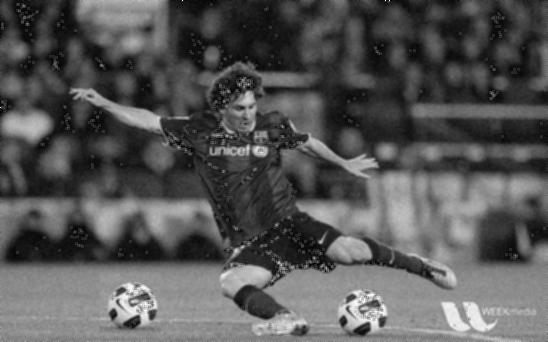

In [49]:
imshow(gausi)
imshow(cleaned)

### Using Scipy, we can get the same results

mode : str or sequence, optional

The mode parameter determines how the input array is extended when the filter overlaps a border. By passing a sequence of modes with length equal to the number of dimensions of the input array, different modes can be specified along each axis. Default value is ‘reflect’. The valid values and their behavior is as follows:

**reflect** (d c b a | a b c d | d c b a)
The input is extended by reflecting about the edge of the last pixel.

**constant** (k k k k | a b c d | k k k k)
The input is extended by filling all values beyond the edge with the same constant value, defined by the cval parameter.

**nearest** (a a a a | a b c d | d d d d)
The input is extended by replicating the last pixel.

**mirror** (d c b | a b c d | c b a)
The input is extended by reflecting about the center of the last pixel.

**wrap** (a b c d | a b c d | a b c d)
The input is extended by wrapping around to the opposite edge.

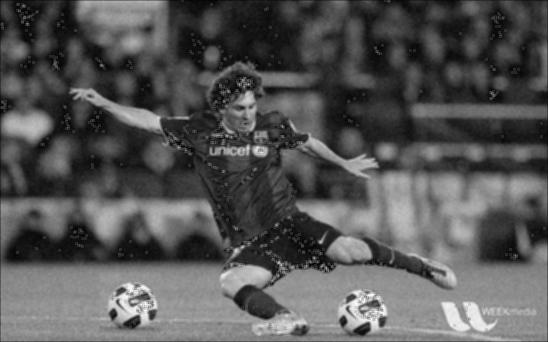

In [50]:
from scipy.ndimage import uniform_filter
cleaned = uniform_filter(gausi, size=3, mode='constant')
imshow(cleaned)

### Using Convolve

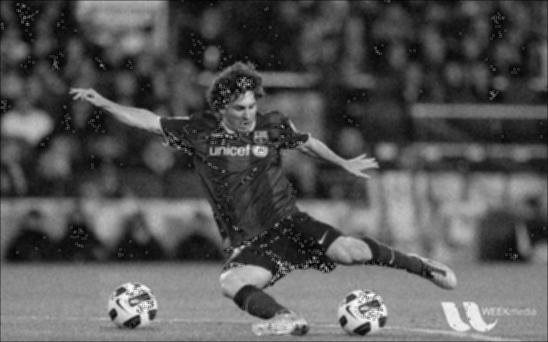

In [51]:
from scipy.ndimage import convolve
kernal = np.ones((3,3))/9
cleaned = convolve(gausi, kernal, mode='constant')
imshow(cleaned)

### Using Correlation

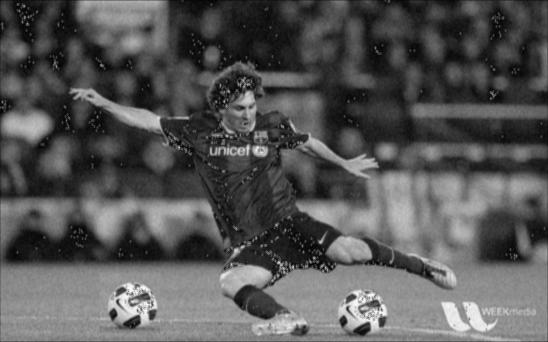

In [52]:
from scipy.ndimage import correlate
kernal = np.array([[0.05,0.2,0.05],[0.1,0.2,0.1],[0.05,0.2,0.05]])
cleaned = correlate(gausi, kernal, mode='constant')
imshow(cleaned)

To blur a single pixel into a "blurry" spot, we would need to need to filter the spot with 

    a. 3x3 square of uniform weights
    b. 11x11 square of uniform weights would be better since it's bigger
    c. Something that looks like a blurry spot-higher values in the middle, falling off to the edges (C)
    
**Example**

In [53]:
# Nearest neighboring pixels have the most influence
kernal = np.array([[1,2,1],[2,4,2],[1,2,1]])/16.0
print (kernal)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


**Circularly symmetric fuzzy blob**

Smooting kernel proportional to:
$$e^{(-\frac{x^2 + y^2}{2\sigma^2})}$$

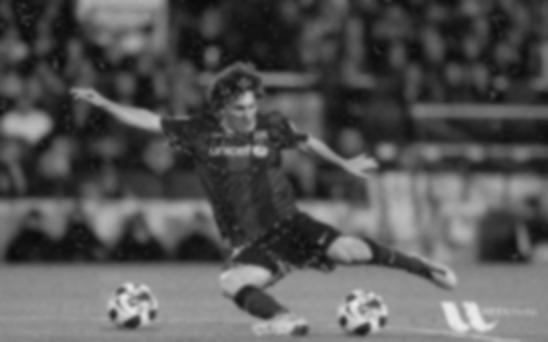

In [54]:
from scipy.ndimage import gaussian_filter
cleaned = gaussian_filter(gausi, sigma=2)
imshow(cleaned)

### Gaussian filters

**variance ($\sigma^2$)** or **standard deviation ($\sigma$)** detrmines extent of smoothing


<span style="color:blue">The smoother one will work better. The bigger the size the better it is</span>

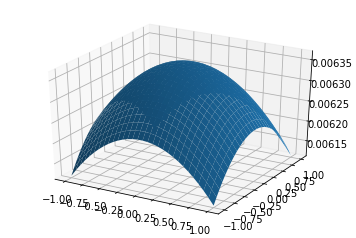

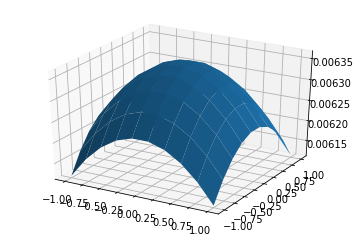

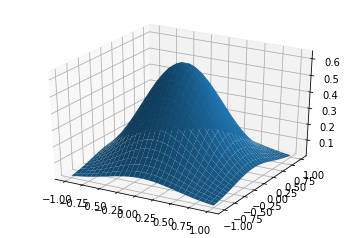

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal
def plot(s,sigma):
    x, y = np.mgrid[-1.0:1.0:s, -1.0:1.0:s]
    xy = np.column_stack([x.flat, y.flat])
    mu = np.array([0.0, 0.0])
    sigma = np.array([sigma, sigma])
    covariance = np.diag(sigma**2)
    z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
    z = z.reshape(x.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z)
    plt.show()
plot(30j,5)
plot(10j,5)
plot(30j,0.5)

**Quiz**
When filtering with a Gausiian, which is true:

    a) The sigma is most important-it defines the blur kernel's scale with respect to the image
    b) The kernal size is most important-because it defines the scale
    c) Altering the normalization coefficient doesn't effect the blur, only the brightness
    d A and C (C)

# =====================================
# 2A - L3 Linearity and convolution
# =====================================

An operator *H* is linear if two properties hold (*f1* and *f2* are some functions, *a* is a constant):

- Additivity:
    - H(*f1* + *f2) = *H*(*f1*) + *H*(*f2*)
- Multiplicative scaling (Homogeneity of degree 1)
    - *H*(a\**f1*) = a\**H*(*f1*)


### Impulse
In the continuous world, an impulse is an idealized function that is very narrow and very tall so that it has a unit area (e.g. its integral is 1)

#### An impulse response
   - If I have an unknwon system and I "put in" an impulse, the response is called the impulse response
       xxx -> H ->> XXXX = h(t)
   
   - So if the black box or the system is linear, you can describe H by h(x)


<img src="snapshots/conv.png" />

### Correlation vs Convolution

- Convolution flip in both dimensions bottom to top, right to left
- For a Gaussian or box filter, nothing differ. 
- Symetric filter doesn't change from convolution to correlation. It is only asymetric that matter. See above examples


### Convolution

- When convolving a filter with an impulse image, we get the filter back as a result. Similarly if we convolve an image with an impulse we get the original image

### Shift invariant

- Operator behaves the same everywhere, i.e. the value of the output depends on the pattern in the image neighborhood, not the position of the neighborhood

### Properties of Convolution
- Linear & shift invariant
- Commutative
    f \* g = g \* f
- Associative (f \* g) \* h = g \* (f \* h)
- Identity unit impulse e = [...,0,0,1,0,0,...]. f \* e = f
- Differentiation 
$$\frac { { \partial  }}{ \partial { x } } (f*g)=\frac { { \partial f }}{ \partial { x } }*g $$


### Separability 

- In some cases, filter is separable, meaning you can get the square kernel H by convolving a single column vector by some row vector

<img src="snapshots/1.png" />


So, now we can do something amazing

*G* = *H* \* *F* = (*C* \* *R*) \* *F* = *C* \* (*R* \* *F*)

- We do two convolutions but each is W*N*N. So this is useful if W is big enough such that 
    
    2*W*N^2 << W^2*N^2

### Boundry Issues

See above example, with mode

### Practice Linear Filter

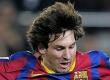

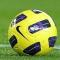

In [56]:
face = messi[60:140, 180:290]
ball = messi[280:340, 330:390]
imshow(face)
imshow(ball)

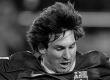

In [57]:
# no change
f1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
filtered = convolve(green(face), f1, mode='constant')
imshow(filtered)

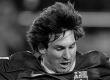

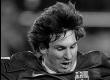

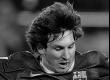

In [58]:
# Shifted, Notice the very black line at the begining and the end of the
# the last two images for convolution and correlation respectively
f2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
conv = convolve(green(face), f2, mode='constant')
corr = correlate(green(face), f2, mode='constant')
imshow(green(face))
imshow(conv)
imshow(corr)

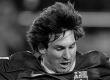

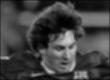

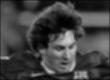

In [59]:
# Blur (with a box filter)
f3 = 1.0/9.0*np.ones((3,3))
conv = convolve(green(face), f3, mode='constant')
corr = correlate(green(face), f3, mode='constant')
imshow(green(face))
imshow(conv)
imshow(corr)

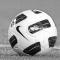

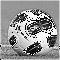

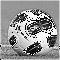

In [60]:
# twise the impulse - blur >>> Sharpening filter 
# Accentuates difference with local average
f4 = np.array([[0,0,0],[0,2,0],[0,0,0]]) - 1.0/9.0*np.ones((3,3))
conv = convolve(green(ball), f4, mode='constant')
corr = correlate(green(ball), f4, mode='constant')
imshow(green(ball))
imshow(conv)
imshow(corr)

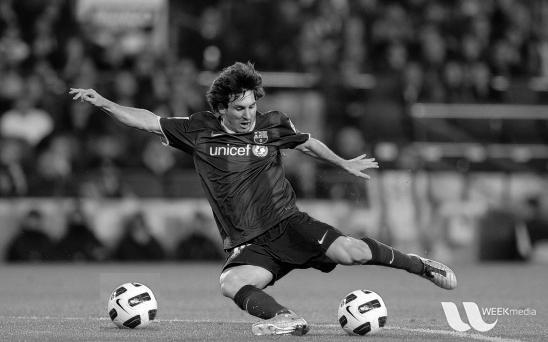

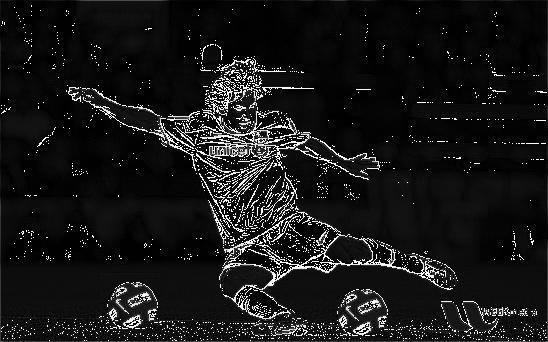

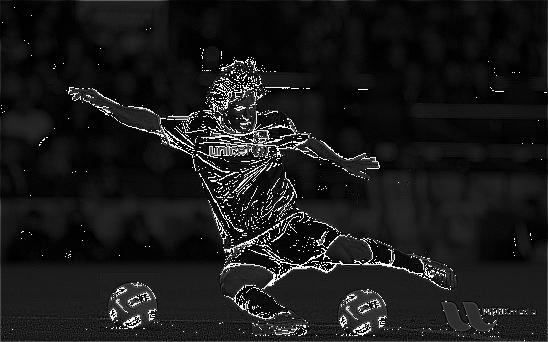

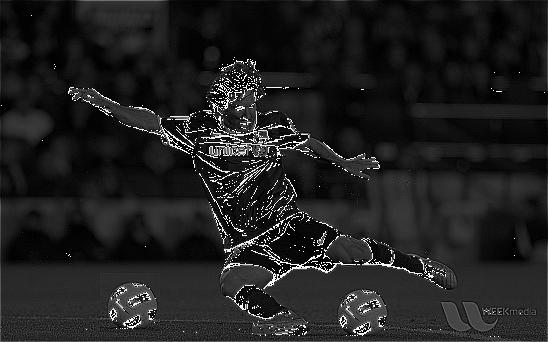

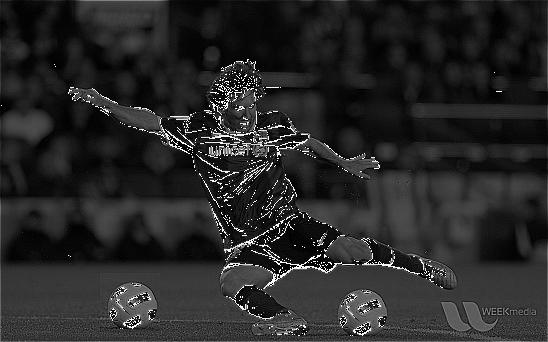

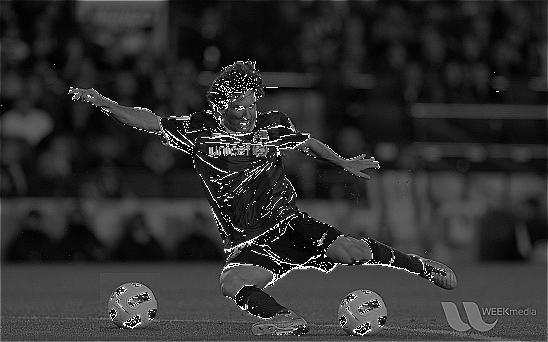

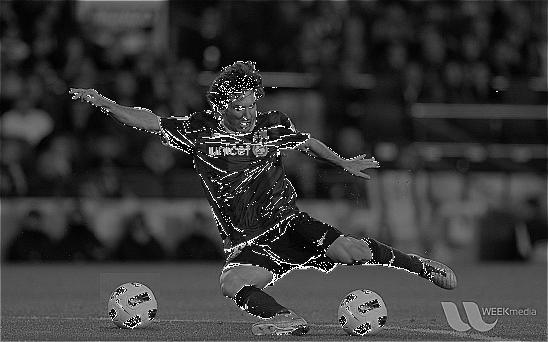

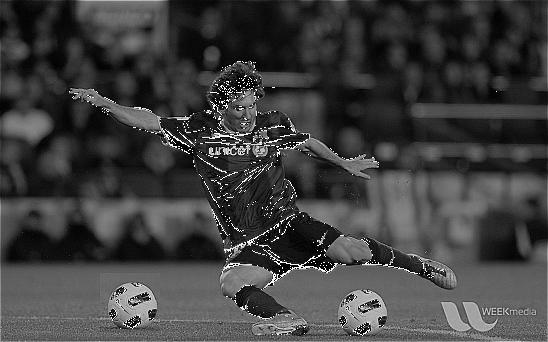

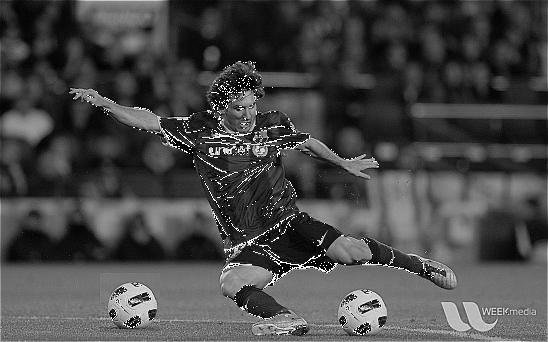

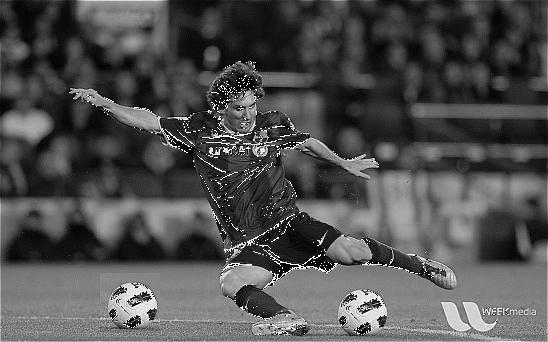

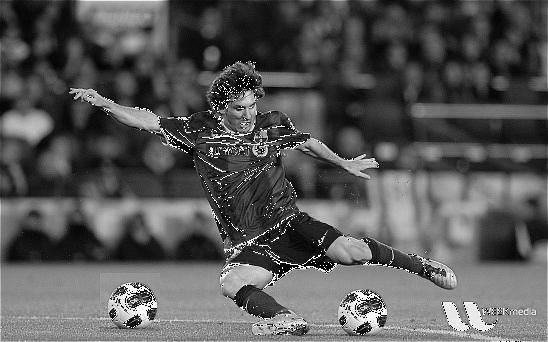

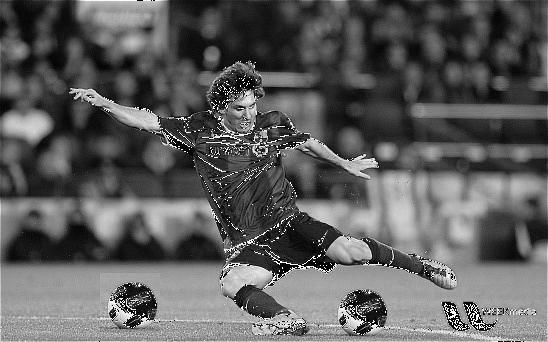

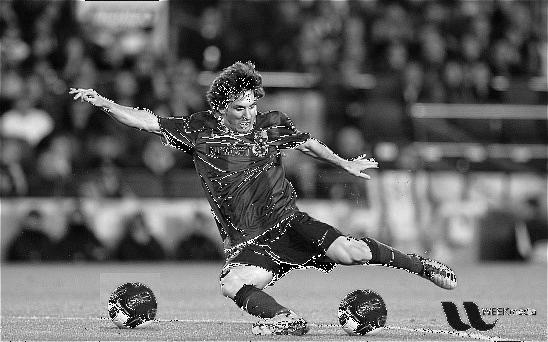

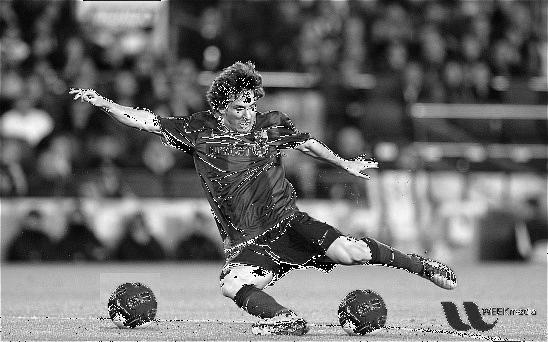

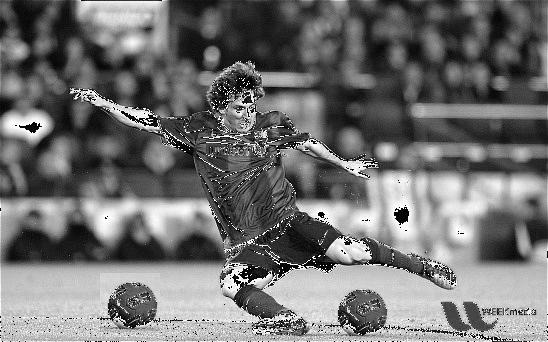

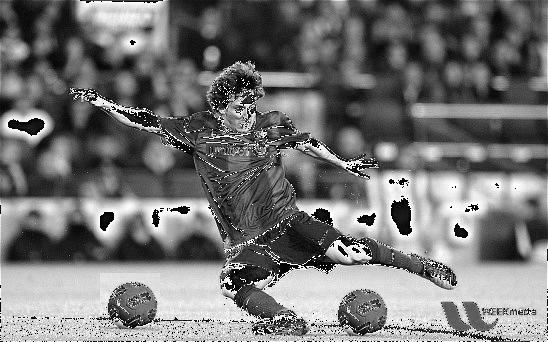

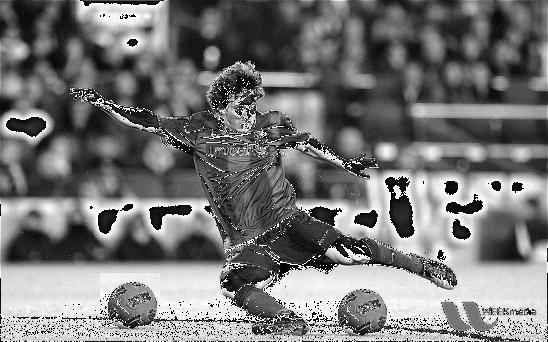

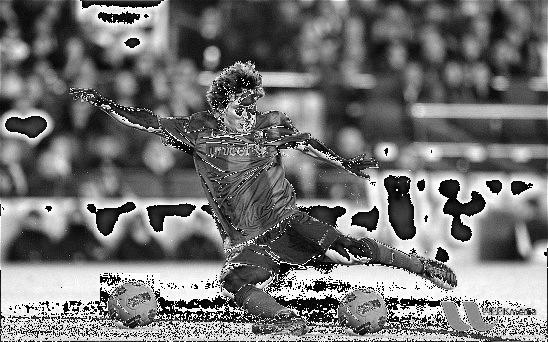

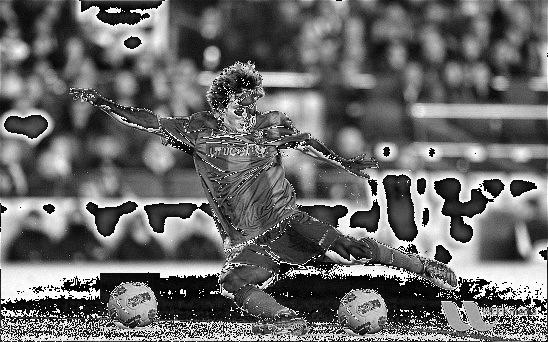

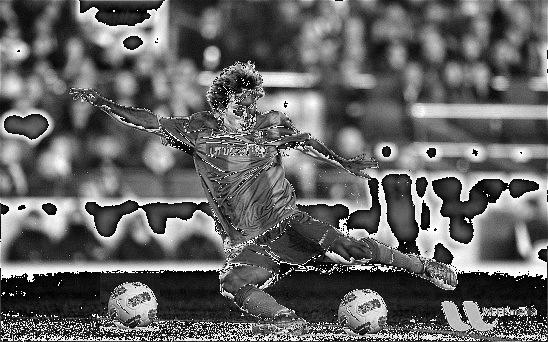

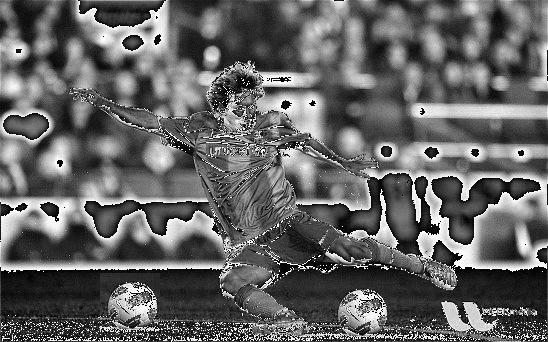

In [61]:
# Messi's image is not working well with this filter
f4 = np.array([[0,0,0],[0,1.0,0],[0,0,0]]) - 1.0/9.0*np.ones((3,3))
imshow(green(messi))
for i in range(20):
    f4 += np.array([[0,0,0],[0,0.1,0],[0,0,0]])
    conv = convolve(green(messi), f4, mode='constant') 
    #imsave(conv,"%d.jpg" % i)
    imshow(conv)

### Median Filter

<img src="snapshots/2.png" />

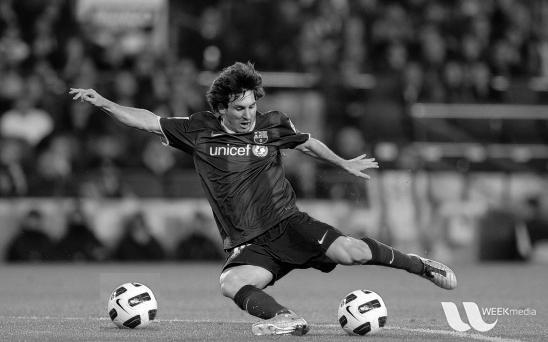

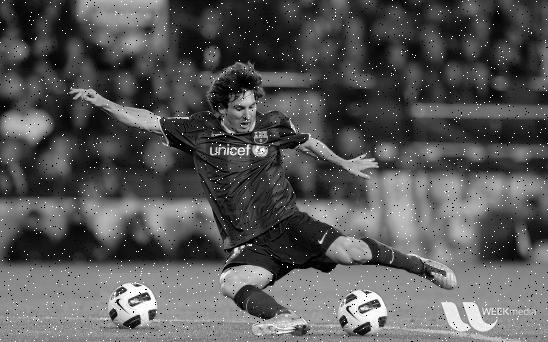

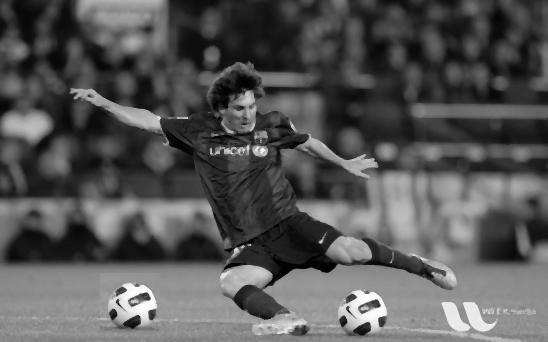

In [62]:
from scipy.ndimage import median_filter
imshow(green(messi))
imshow(salty)
imshow(median_filter(salty,(3,3)))

*The following code are not part of this chapter but meant for a friend who asked me for a workflow to extract items and prices from a brochure*

In [66]:
# items = cv.imread("items.jpg")
# items = cv.cvtColor(items, cv.COLOR_BGR2RGB)

In [67]:
#imshow(items)

In [68]:
# items = cv.imread("items.jpg")
# items = cv.cvtColor(items, cv.COLOR_BGR2RGB)
# def angle_cos(p0, p1, p2):
#     d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
#     return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

# def find_squares(img):
#     img = cv.GaussianBlur(img, (5, 5), 0)
#     squares = []
#     for gray in cv.split(img):
#         for thrs in xrange(0, 255, 150):
#             if thrs == 0:
#                 bin = cv.Canny(gray, 0, 50, apertureSize=5)
#                 bin = cv.dilate(bin, None)
#             else:
#                 _retval, bin = cv.threshold(gray, thrs, 255, cv.THRESH_BINARY)
#             x =  cv.findContours(bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
#             bin, contours = x[1],x[0]
#             for cnt in contours:
#                 cnt_len = cv.arcLength(cnt, True)
#                 cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
#                 if len(cnt) == 4 and cv.contourArea(cnt) > 1000 and cv.isContourConvex(cnt):
#                     cnt = cnt.reshape(-1, 2)
#                     max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in xrange(4)])
#                     if max_cos < 0.1:
#                         squares.append(cnt)
#     return squares
# gray_image = cv.convertScaleAbs(items)
# squares = find_squares(gray_image)
# cv.drawContours( items, squares, -1, (0, 255, 0), 3 )
# imshow(items)

In [69]:
# s =  squares[11]
# def height(s):
#     return max(s[3][0],s[2][0]) - min(s[0][0],s[1][0])
# def width(s):
#     return max(s[1][1],s[2][1]) - min(s[0][1],s[3][1])

# for s in squares:
#     if width(s)< 200 and height(s) < 500:
#         try:
#             imshow(items[min(s[0][1],s[3][1]):max(s[1][1],s[2][1]),min(s[0][0],s[1][0]):max(s[3][0],s[2][0])])
#         except ValueError:
#             continue

# =====================================
# 2A - L4 Filters as templates
# =====================================

## 1D (nx) correlation

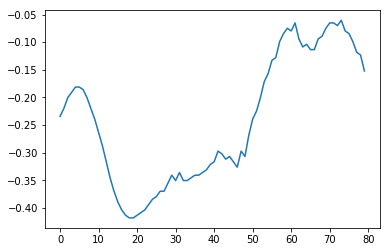

In [70]:
%matplotlib inline
def normalize(s):
    start = -0.5
    end = 0.5
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res
signal = (green(messi)[100,:]).astype(np.float64)
signal = normalize(signal)
signal = signal[120:200]
plt.plot(signal)

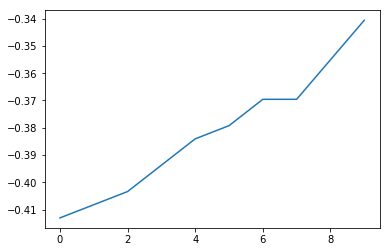

In [71]:
f = signal[20:30]
plt.plot(f)

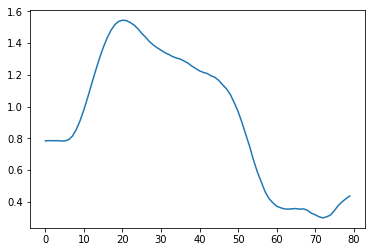

In [72]:
norm_c_c = correlate(signal,f)
plt.plot(norm_c_c)


<font color='red'>**Note**</font>: The plot is at its maximum from where the snapped were taken from. So, the highest value when these things match. This is the case because the sign matches most at the filter signal. In other words the filter and the signal will have the same signs and thus the multiplication will be at its highest.

### Lets do the same with 2D image

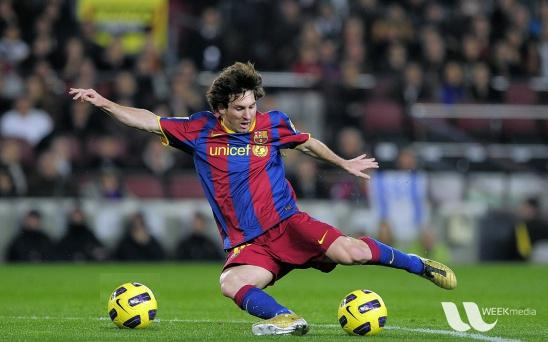

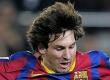

In [73]:
imshow(messi)
imshow(face)

In [74]:
########################################################################################
# Author: Ujash Joshi, University of Toronto, 2017                                     #
# Based on Octave implementation by: Benjamin Eltzner, 2014 <b.eltzner@gmx.de>         #
# Octave/Matlab normxcorr2 implementation in python 3.5                                #
# Details:                                                                             #
# Normalized cross-correlation. Similiar results upto 3 significant digits.            #
# https://github.com/Sabrewarrior/normxcorr2-python/master/norxcorr2.py                #
# http://lordsabre.blogspot.ca/2017/09/matlab-normxcorr2-implemented-in-python.html    #
########################################################################################

import numpy as np
from scipy.signal import fftconvolve


def normxcorr2(template, image, mode="full"):
    """
    Input arrays should be floating point numbers.
    :param template: N-D array, of template or filter you are using for cross-correlation.
    Must be less or equal dimensions to image.
    Length of each dimension must be less than length of image.
    :param image: N-D array
    :param mode: Options, "full", "valid", "same"
    full (Default): The output of fftconvolve is the full discrete linear convolution of the inputs. 
    Output size will be image size + 1/2 template size in each dimension.
    valid: The output consists only of those elements that do not rely on the zero-padding.
    same: The output is the same size as image, centered with respect to the ‘full’ output.
    :return: N-D array of same dimensions as image. Size depends on mode parameter.
    """

    # If this happens, it is probably a mistake
    if np.ndim(template) > np.ndim(image) or \
            len([i for i in range(np.ndim(template)) if template.shape[i] > image.shape[i]]) > 0:
        print("normxcorr2: TEMPLATE larger than IMG. Arguments may be swapped.")

    template = template - np.mean(template)
    image = image - np.mean(image)

    a1 = np.ones(template.shape)
    # Faster to flip up down and left right then use fftconvolve instead of scipy's correlate
    ar = np.flipud(np.fliplr(template))
    out = fftconvolve(image, ar.conj(), mode=mode)
    
    image = fftconvolve(np.square(image), a1, mode=mode) - \
            np.square(fftconvolve(image, a1, mode=mode)) / (np.prod(template.shape))

    # Remove small machine precision errors after subtraction
    image[np.where(image < 0)] = 0

    template = np.sum(np.square(template))
    out = out / np.sqrt(image * template)

    # Remove any divisions by 0 or very close to 0
    out[np.where(np.logical_not(np.isfinite(out)))] = 0
    
    return out

In [75]:
messi_n = green(messi)
face_n = green(face)
# the below command take some time
norm_c_c = normxcorr2(face_n,messi_n)

In [76]:
norm_c_c

array([[ 0.00665622,  0.00940778,  0.01196748, ...,  0.00688901,
         0.00545549,  0.0034785 ],
       [ 0.00990946,  0.0135169 ,  0.01595593, ...,  0.01215596,
         0.0099188 ,  0.00657256],
       [ 0.01210617,  0.01602888,  0.01856008, ...,  0.01465098,
         0.01191822,  0.00852078],
       ...,
       [-0.01562256, -0.0221846 , -0.026597  , ..., -0.01014093,
        -0.00895118, -0.00737548],
       [-0.01262452, -0.01786993, -0.02143039, ..., -0.00989357,
        -0.0086786 , -0.0068742 ],
       [-0.00885618, -0.01244466, -0.01490985, ..., -0.00813844,
        -0.00700232, -0.00543402]])

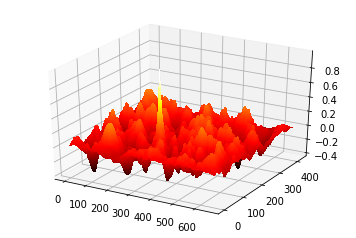

In [77]:
def plot_3d(arr):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    w, h = arr.shape
    Y = np.arange(1, w+1)
    X = np.arange(1, h+1)
    X, Y = np.meshgrid(X, Y)
    Z = arr
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

plot_3d(norm_c_c)

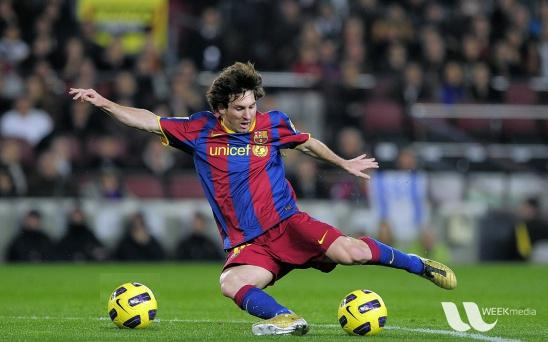

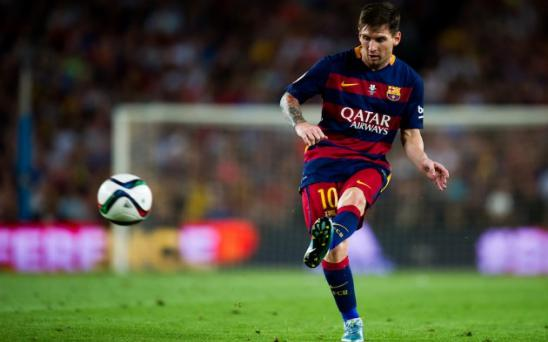

In [78]:
imshow(messi)
imshow(messi2)

Now lets see if we can find Messi's face in the second image using his face in the first image

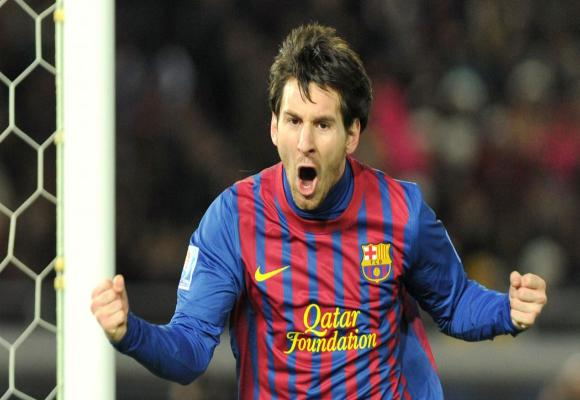

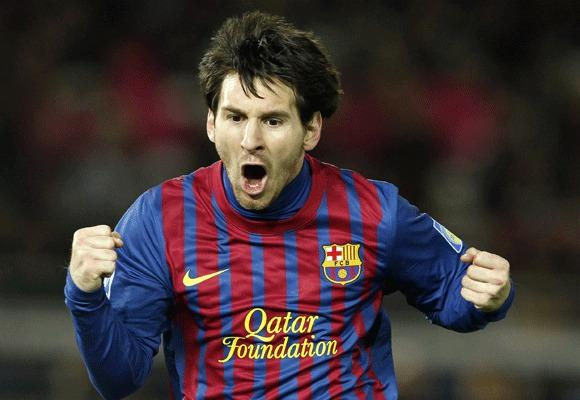

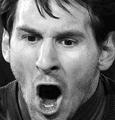

In [79]:
messi3 = cv.imread("messi5.jpg")
messi3 = cv.cvtColor(messi3, cv.COLOR_BGR2RGB)
messi4 = cv.imread("messi4.jpg")
messi4 = cv.cvtColor(messi4, cv.COLOR_BGR2RGB)
messi3 = resize(messi3,(messi4.shape[1],messi4.shape[0]))
imshow(messi3)
imshow(messi4)
img = green(messi3)

template = green(messi4)
#only the face
template = template[80:200,205:320]
imshow(template)

corr = normxcorr2(template,img,"full")

In [80]:
from numpy import unravel_index
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

******Template******


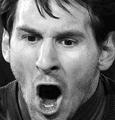

******Match******


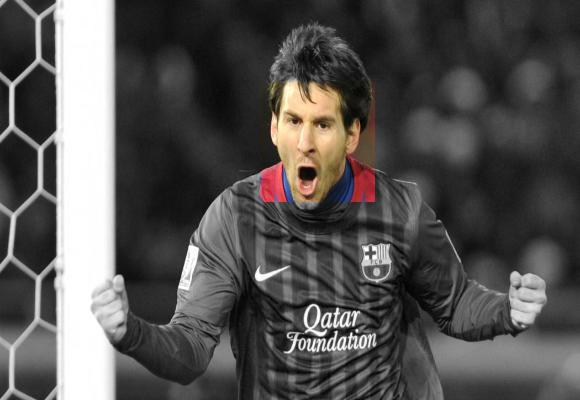

In [82]:
x,y = unravel_index(corr.argmax(), corr.shape)
w,h = template.shape
im = messi3.copy()
im[:,:,0] = img
im[:,:,1] = img
im[:,:,2] = img
im[x-w:x,y-h:y] = messi3[x-w:x,y-h:y] 
print ("******Template******")
imshow(template)
print ("******Match******")
imshow(im)


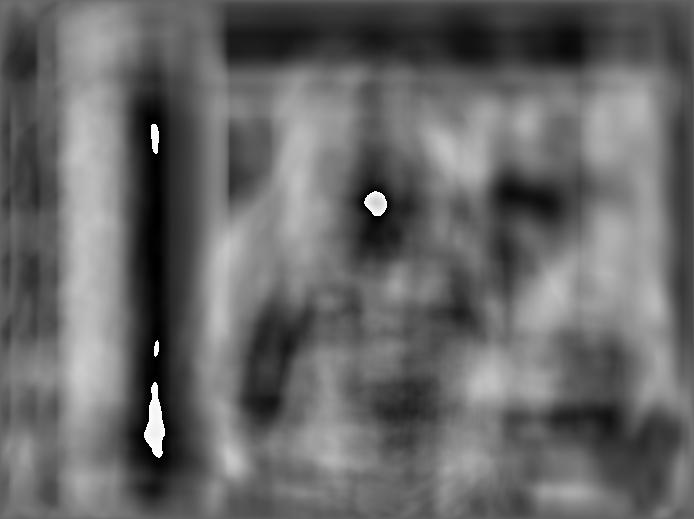

In [105]:
grayImg = 255-255*(corr + corr.max())/(corr.max()-corr.min())
grayImg = grayImg.astype(np.uint8)
imshow(grayImg)

# =====================================
# 2A - L5-6 Edge Detection: Gradients & 2D operators
# =====================================

### Origin of Edges:

- surface normal discontinuity
- depth discontinuity
- surface color discontinuity
- illumination discontinuity

<img src="snapshots/3.png" />

## Derivatives and edges

An edge is a place of rapid change in the image intensity function

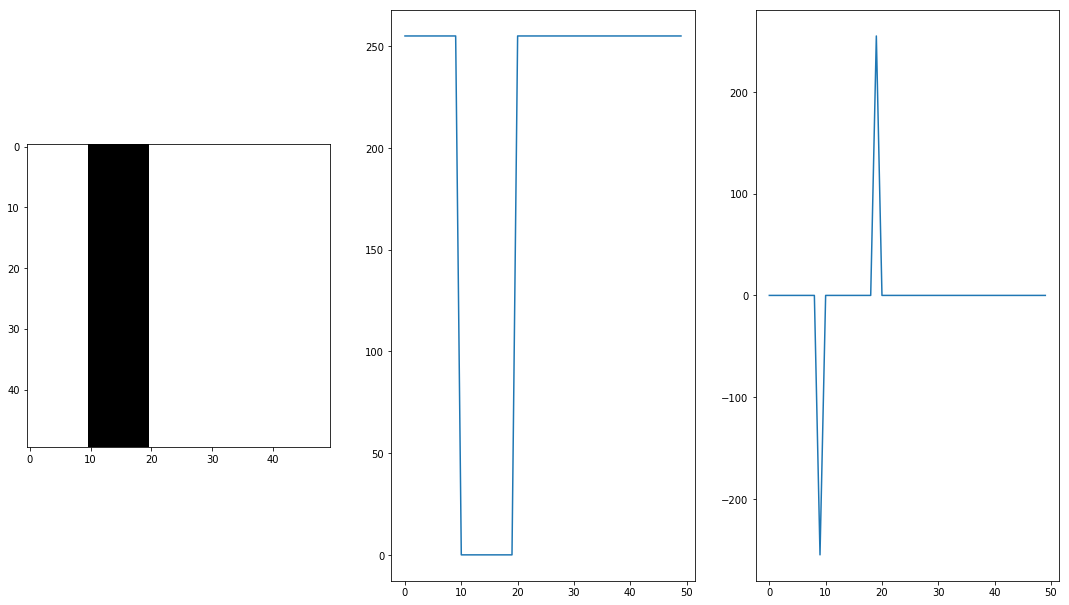

In [106]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

x = np.ones((50,50))*255
x[:,10:20] = 0
ax = plt.subplot(131)
ax.imshow(x)

# Plotting scanline
ax = plt.subplot(132)
ax.plot(x[10,:])

### Finding Derivative 
### https://plot.ly/python/numerical-differentiation/
x10 = np.arange(50)
y = x[10,:]
dy = np.zeros(y.shape,np.float)
dy[0:-1] = np.diff(y)/np.diff(x10)
dy[-1] = (y[-1] - y[-2])/(x10[-1] - x10[-2])
ax = plt.subplot(133)
ax.plot(dy)

<img src="snapshots/4.png" />

In [107]:
zebra = cv.imread("zebra.jpg")

### Gradient Simple Implementation


In [108]:
def grad_x(img):
    img2 = img.astype(np.float)
    dimg = np.zeros(img.shape).astype(np.float)
    for i in range(img2.shape[0]):
        y = img2[i,:]
        x = np.arange(img2.shape[1]).astype(np.float)
        dy = np.zeros(y.shape,np.float).astype(np.float)
        dy[0:-1] = np.diff(y)/np.diff(x)
        dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
        dimg[i] = dy
    return dimg
def grad_y(img):
    img2 = img.astype(np.float)
    dimg = np.zeros(img.shape).astype(np.float)
    for i in range(img2.shape[1]):
        y = img2[:,i]
        x = np.arange(img2.shape[0]).astype(np.float)
        dy = np.zeros(y.shape,np.float).astype(np.float)
        dy[0:-1] = np.diff(y)/np.diff(x)
        dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
        dimg[:,i] = dy
    return dimg
def display_grid(imgs,titles):
    plt.gray()
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.imshow(imgs[0])
    plt.title(titles[0], size=20)
    if len(imgs)> 1:
        plt.subplot(222)
        plt.imshow(imgs[1])
        plt.title(titles[1], size=20)
    if len(imgs)> 2:
        plt.subplot(223)
        plt.imshow(imgs[2])
        plt.title(titles[2], size=20)
    if len(imgs)> 3:
        plt.subplot(224)
        plt.imshow(imgs[3])
        plt.title(titles[3], size=20)
    plt.show()
def display_pair(imgs,titles):
    plt.gray()
    plt.figure(figsize=(20,20))
    
    plt.subplot(121)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.imshow(imgs[0])
    plt.title(titles[0], size=20)
    if len(imgs)> 1:
        plt.subplot(122)
        plt.imshow(imgs[1])
        plt.title(titles[1], size=20)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.show()

<Figure size 432x288 with 0 Axes>

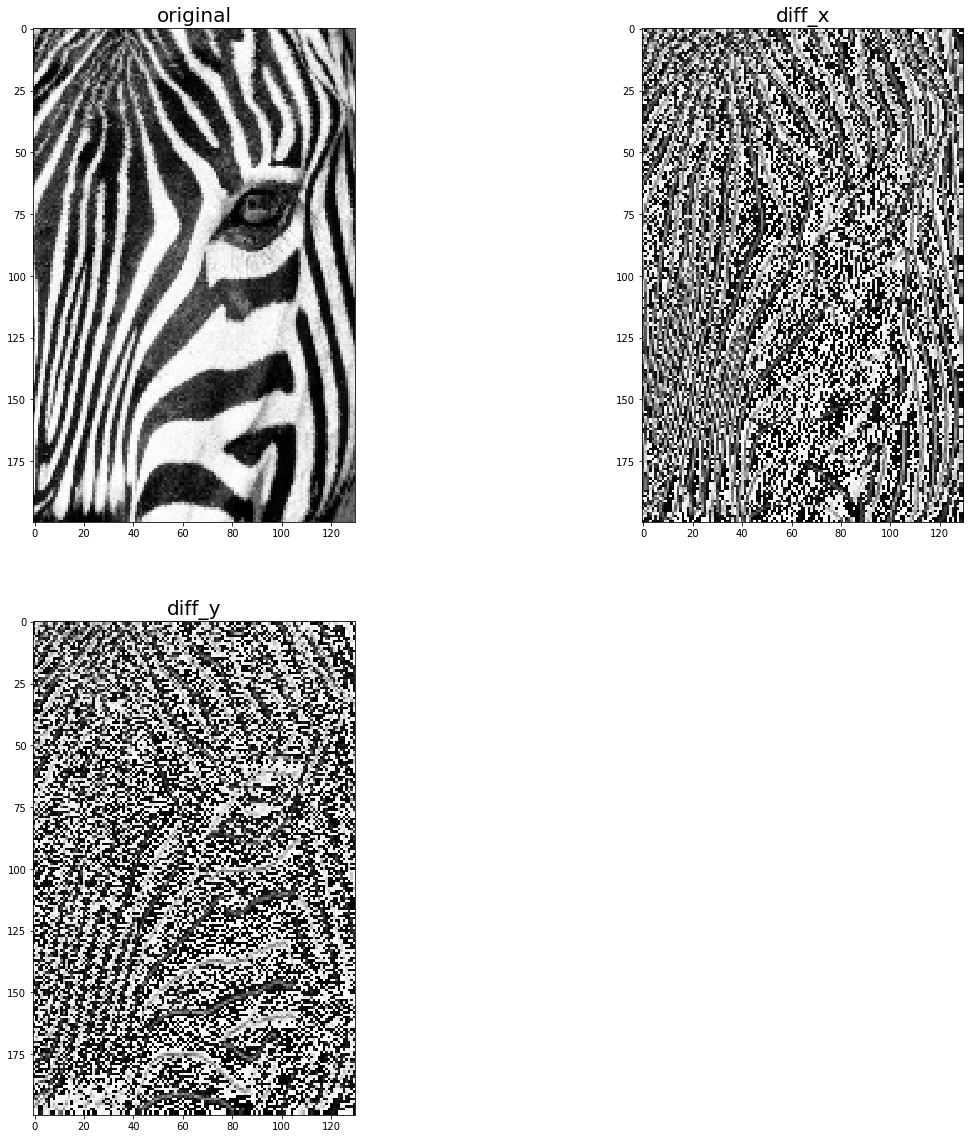

In [109]:
### Smoothing first
s = 1
zebra_res = resize(green(zebra),(130,200))
kernel = np.ones((s,s),np.float32)/s**2
dst = cv.filter2D(zebra_res,-1,kernel)
### Taking the gradient 
xdimg = grad_x(dst).astype(np.uint8)
ydimg = grad_y(dst).astype(np.uint8)
display_grid([dst,xdimg,ydimg],["original","diff_x","diff_y"])

<img src="snapshots/5.png" />

## Using sobel operator (skimage library)

<img src="snapshots/6.png" />

<Figure size 432x288 with 0 Axes>

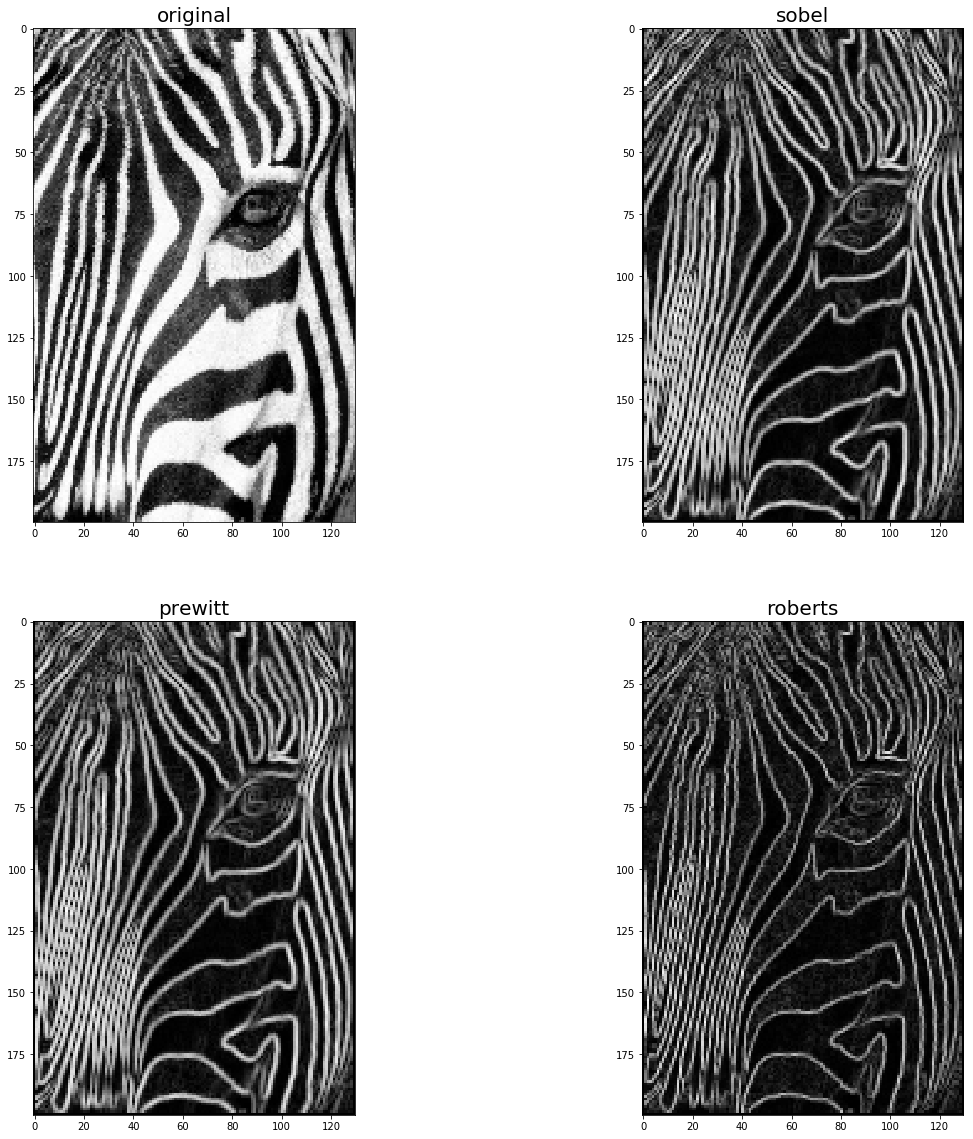

In [110]:
%matplotlib inline
from skimage import filters
def sobel(img):
    edges_x = filters.sobel_h(img) 
    edges_y = filters.sobel_v(img)
    edges = filters.sobel(img)
    return edges_x,edges_y,edges

def prewitt(img):
    edges_x = filters.prewitt_h(img) 
    edges_y = filters.prewitt_v(img)
    edges = filters.prewitt(img)
    return edges_x,edges_y,edges 

def roberts(img):
    edges_x = filters.roberts_pos_diag(img) 
    edges_y = filters.roberts_neg_diag(img)
    edges = filters.roberts(img)
    return edges_x,edges_y,edges 

x1,y1,d1 = sobel(zebra_res)
#display_grid([zebra_res,x,y,d],["original","sobel_x","sobel_y","sobel"])
x2,y2,d2 = prewitt(zebra_res)
#display_grid([zebra_res,x,y,d],["original","prewitt_x","prewitt_y","prewitt"])
x3,y3,d3 = roberts(zebra_res)
#display_grid([zebra_res,x,y,d],["original","roberts_pose_diag","roberts_neg_diag","roberts"])
display_grid([zebra_res,d1,d2,d3],["original","sobel","prewitt","roberts"])

### Lets try with Messi

<Figure size 432x288 with 0 Axes>

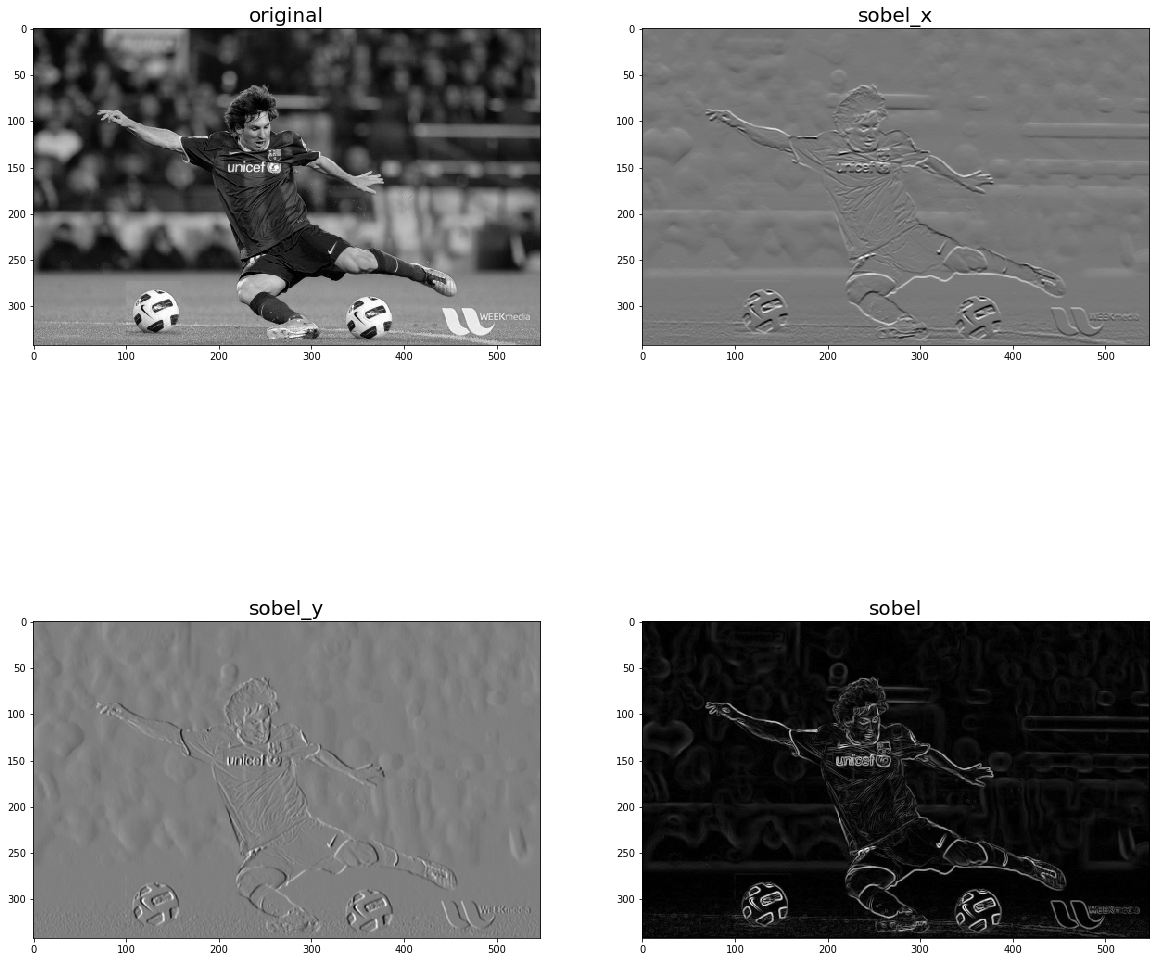

In [111]:
x,y,d = sobel(green(messi))
display_grid([green(messi),x,y,d],["original","sobel_x","sobel_y","sobel"])

# <font color='red'> 🤩 Lovely 🤩</font>

\*\***Visit the implementation for the previous filters function in the library skimage**

## Canny Edge Operator

1. Filter image with derivative of Gaussian
2. Find Magnitude and orientation of gradient
3. Non-maximum suppression:
    Thin mult-pixel wide "ridges" down to single pixel width
4. Linking and thresholding (hysteresis):
    - Define two thresholds: low and high
    - Use the high threshold to start edge curves and the low threshold to continue them
    

<Figure size 432x288 with 0 Axes>

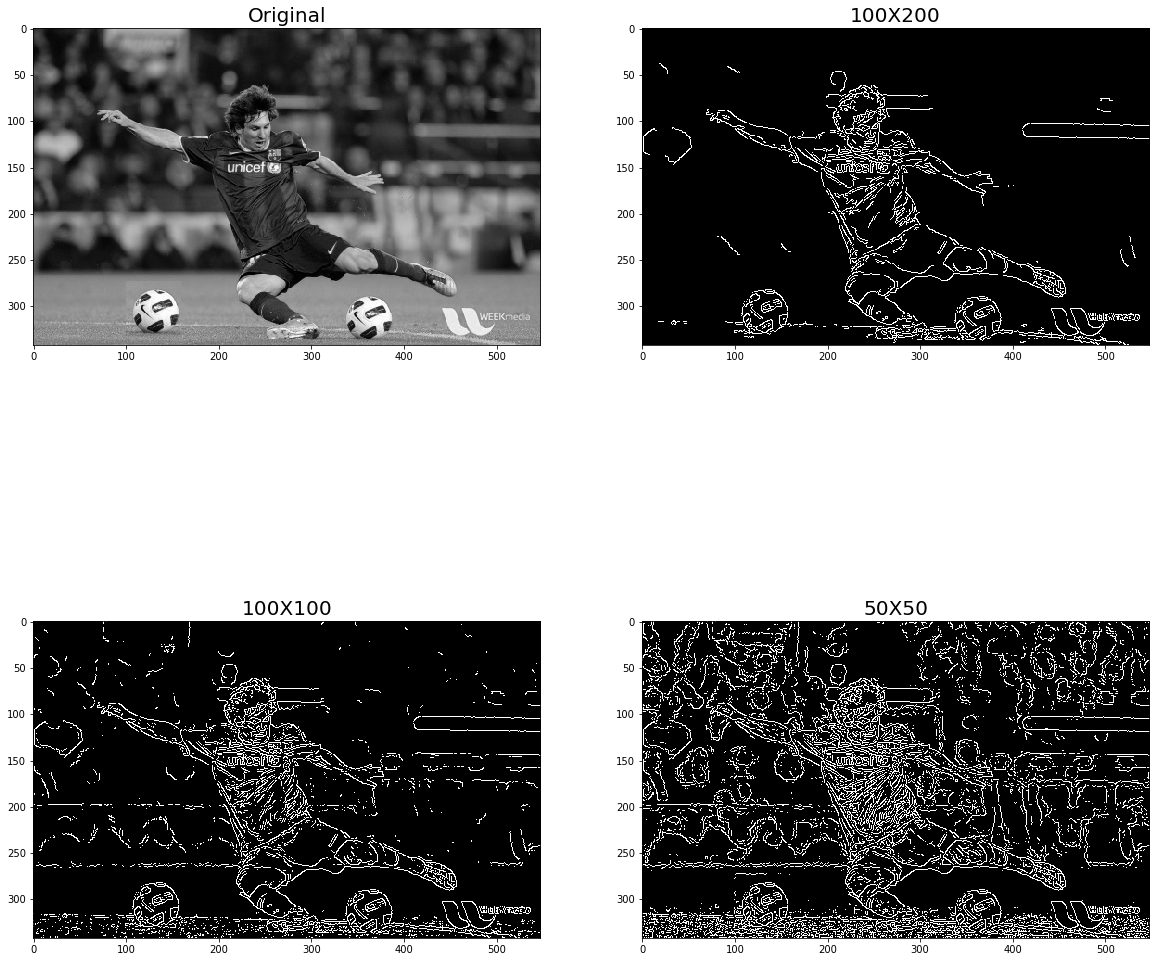

In [112]:
edges = cv.Canny(green(messi),100,200)
edges1 = cv.Canny(green(messi),100,100)
edges2 = cv.Canny(green(messi),50,50)
display_grid([green(messi),edges,edges1,edges2],["Original","100X200","100X100","50X50"])

## Laplacian

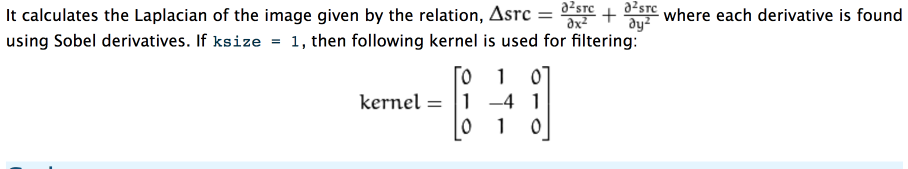

<Figure size 432x288 with 0 Axes>

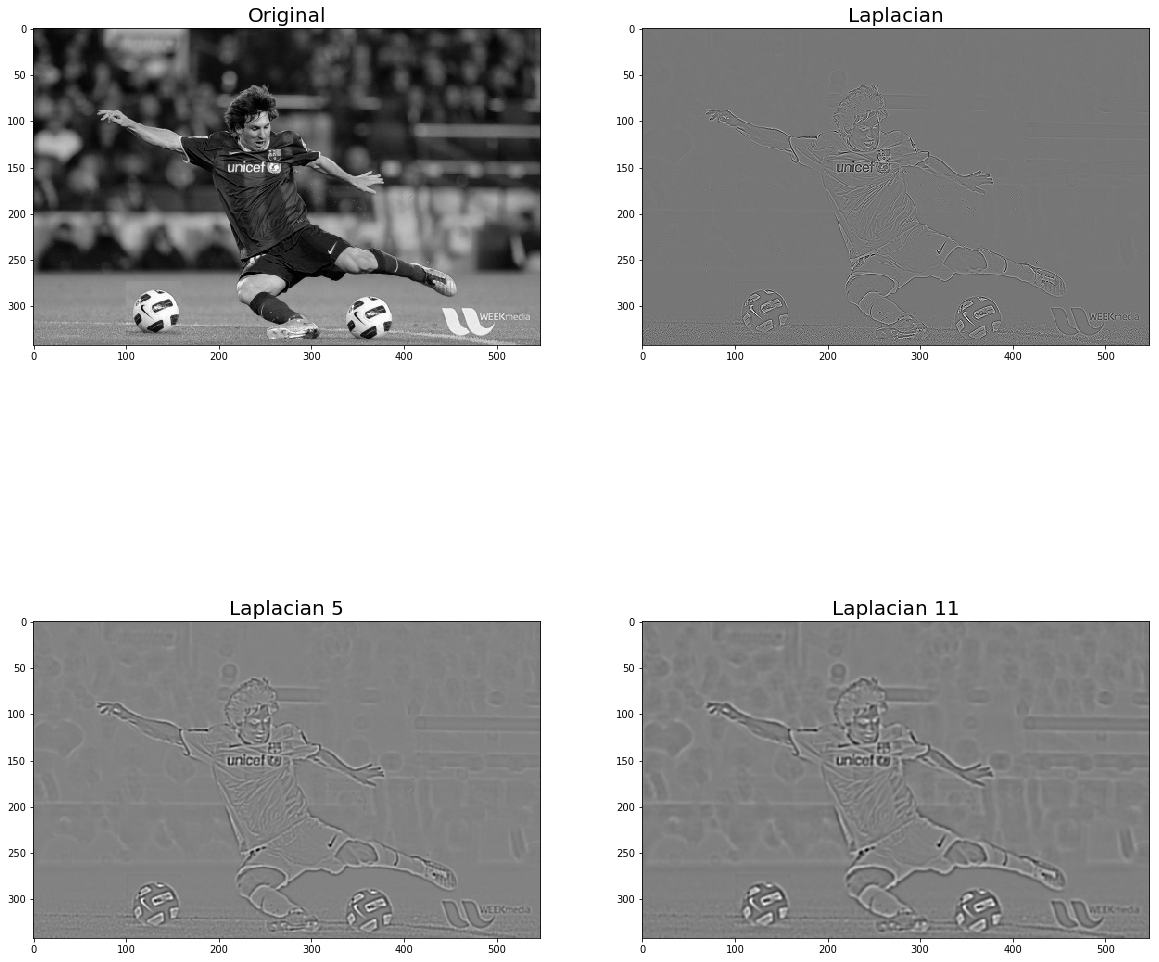

In [113]:
edges = cv.Laplacian(green(messi),cv.CV_64F)
edges1 = cv.Laplacian(green(messi),cv.CV_64F,ksize=7)
edges2 = cv.Laplacian(green(messi),cv.CV_64F,ksize=11)
display_grid([green(messi),edges,edges1,edges2],["Original","Laplacian","Laplacian 5","Laplacian 11"])

# =====================================
# 2B - L1 Hough Transform: Lines
# =====================================

### Parametric model

- A parametric model can represent a class of instances where each is defined by a value of the parameters
- Examples include lines, or circles, or even a parameterized template

### Fitting a parametric model
- Choose a parametric model to represent a set of features
- Membership criterion is not local
    - can't tell whether a point in the image belongs to a given model just by looking at that point
- Computational complexity is important
    - not feasible to examine possible parameter setting


### Example: Line fitting

In [114]:
building = imread("building.png")
road = imread("road.png")

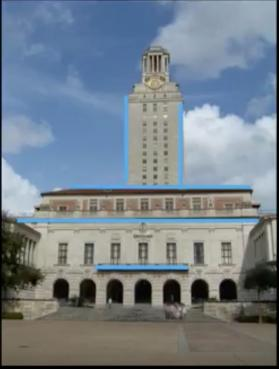

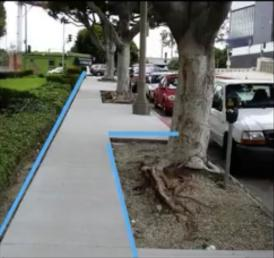

In [115]:
imshow(building)
imshow(road)

In [116]:
building = imread("building2.jpg")
building = resize(building,(520,350))

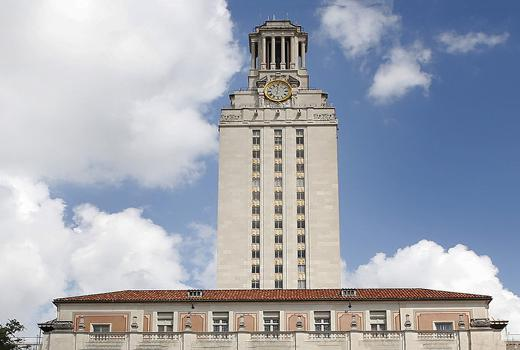

In [117]:
imshow(building)

### Difficulty of line fitting

- Extra edge points (clutter), multiple models
- Only some parts of each line detected, and some parts are missing
- Noise in measured edge points, orientation

In [118]:
edges = cv.Canny(green(building),100,100)

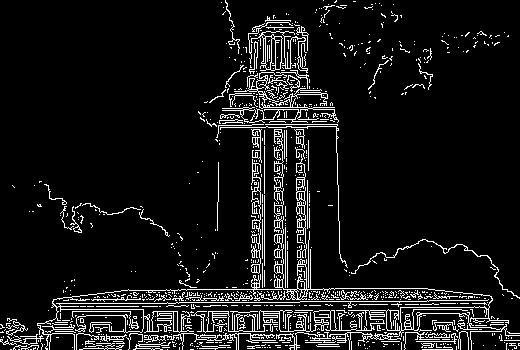

In [119]:
imshow(edges)

### Voting

**voting** is a general technique where we let the features vote for all models that are compatible with it.

1. Cycle through features, each casting votes for model parameters
2. Look for model parameters that receive a lot of votes


#### Why it works?!!

- Noise & clutter features will cast votes too, but typically their votes should be inconsistent with the majority of "good" features.
- Ok if some features not observed, as model can span multiple fragments

## Fitting lines

To fit lines we need to answer few questions:
- Given points that belongs to a line, what is the line?
- How many lines are there?
- Which points belong to which lines?

### Hough Transform

It is a voting technique that can be used to answer all of these. Its main idea is:
    1. Each edge point votes for compatible lines.
    2. Look for lines that get many votes

### Hough Space

<img src="snapshots/7.png" />
<img src="snapshots/8.png" />

**The line has to point where the two lines intersect at hough space.**

<img src="snapshots/9.png" />

### Polar representation of lines

<img src="snapshots/10.png" />

** Point in image space is now sinusoid segment in Hough space **

### Hough transform algorithm

Using the polar parameterization:
    
$$ x*cos(\theta) - y*sin(\theta) = d $$

And a Hough Accumulator Array(keeps the votes)

<img src="snapshots/11.png" />


1. Initialize H[d, $\theta$] = 0
2. For each **edge** point in ***E(x,y)*** in the image
    - for $\theta$ = 0 to 180 
        - d = $x*cos(\theta) - y*sin(\theta)$
        - H[d,$\theta$] += 1
3. Find the value(s) of (d,$\theta$) where H[d,$\theta$] is maximum
4. The detected line in the image is given by 
$$ d = x*cos(\theta) - y*sin(\theta) $$

https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html

In [129]:
def find_lines(img,minLineLength=100,maxLineGap=20,rho = 1,canny_t=(150,150),top=10):
    img2 = img.copy()
    gimg2 = gray(img)
    edges = cv.Canny(gimg2,canny_t[0],canny_t[1],apertureSize =3)
    imshow(edges)
    lines = cv.HoughLinesP(edges,
                           rho = rho,
                           theta = np.pi/180,threshold = 1,
                           minLineLength = minLineLength,
                           maxLineGap = maxLineGap)
    try:
        mag = [np.sqrt(np.power(y2-y1,2)+np.power(x2-x1,2)) for x1,y1,x2,y2 in lines[0]]
        mag = zip(np.arange(len(mag)),mag)
        mag = sorted(mag, key=lambda tup: tup[1],reverse=True)
        lines = lines[0]
        
        for i in range(min(len(mag),top)):
            index = mag[i][0]
            x1,y1,x2,y2 = lines[index]
            cv.line(img2,(x1,y1),(x2,y2),(0,255,0),2)
    except:
        raise
    imshow(img2)

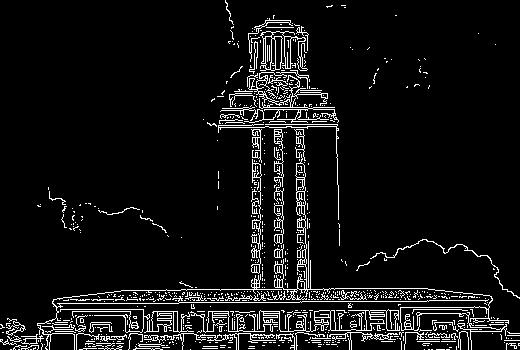

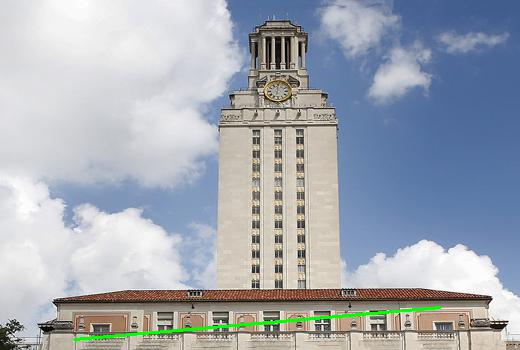

In [130]:
find_lines(building)

### Now lets try Messi

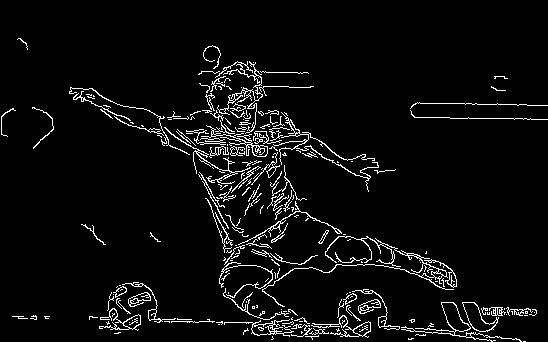

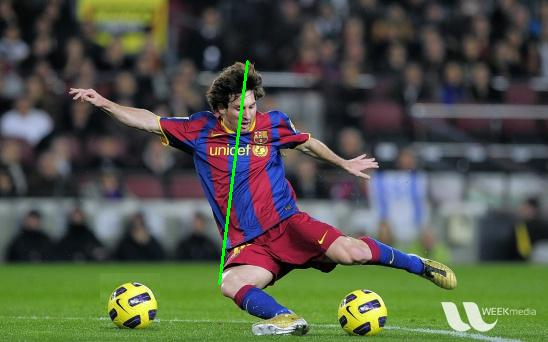

In [131]:
find_lines(messi,minLineLength=100,maxLineGap=20,rho=1,canny_t=(200,100),top=10)

# <font color='red'>  🤨 Really!!!  🤨</font>

# =====================================
# 2B - L2 Hough Transform: Circles
# =====================================

## Hough Transform for Circles

- Circle: center (a,b) and radius r 
$$({x}_{i} - a)^2 + ({y}_{i} - b)^2 = r^2$$

- For a fixed radius r, uknown gradient direction:
- Votes for circle

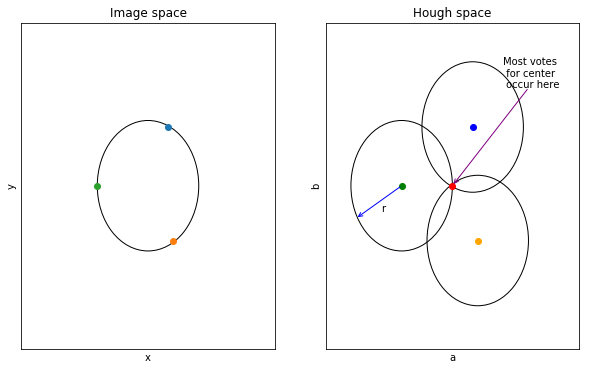

In [132]:
%matplotlib inline
circle1 = plt.Circle((.5, .5), 0.2, color=None,fill=False)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)
ax1,ax2 = ax[0],ax[1]
ax1.add_artist(circle1)
ax1.plot([0.58],[0.68],'o')
ax1.plot([0.60],[0.332],'o')
ax1.plot([0.3],[0.5],'o')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.set_title("Image space")
ax1.set_yticks([])
ax1.set_xticks([])

circle2 = plt.Circle((.3, .5), 0.2, color=None,fill=False)
ax2.plot([0.3],[0.5],'o',color='g')

circle3 = plt.Circle((.60, .332), 0.2, color=None,fill=False)
ax2.plot([0.6],[0.332],'o',color='orange')


circle4 = plt.Circle((.58, .68), 0.2, color=None,fill=False)
ax2.plot([0.58],[0.68],'o',color='b')

ax2.plot([0.5],[0.5],'o',color='r')

ax2.add_artist(circle2)
ax2.add_artist(circle3)
ax2.add_artist(circle4)
ax2.annotate("", xy=(.12, .4), xytext=(.3, .5),arrowprops=dict(label="",arrowstyle="->",color="blue"))
ax2.annotate("r", xy=(.22, .42))

ax2.annotate("", xy=(.5, .5), xytext=(0.8, 0.8),arrowprops=dict(label="",arrowstyle="->",color="purple"))
ax2.annotate("Most votes\n for center\n occur here",xy=(0.7, 0.8),)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_ylabel("b")
ax2.set_xlabel("a")
ax2.set_title("Hough space")
ax2.set_yticks([])
ax2.set_xticks([])

plt.show()



- For uknown radius r, no gradient:
    - each points for a cone

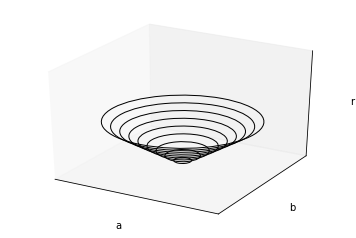

In [133]:
%matplotlib inline
from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw a circle on the x=0 'wall'
ps = []
for i in range(1,10):
    p = Circle((10, 10), i,fill=False)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("r")
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()



## Algorithm

- For e in edges(x,y)
    - For r in all(radii):
        - For $\theta$ in all(gradient directions):
            - a = x - r*cos($\theta$)
            - b = y + r*sin($\theta$)
            - H[a,b,r] += 1

In [140]:
def find_circles(img,minDist=100,accValue=200):
    output = img.copy()
    grayim = gray(output)
    circles = cv.HoughCircles(grayim, cv.HOUGH_GRADIENT, accValue, minDist)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv.circle(output, (x, y), r, (0, 255, 0), 4)
            cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        # show the output image
        imshow(np.hstack([output]))


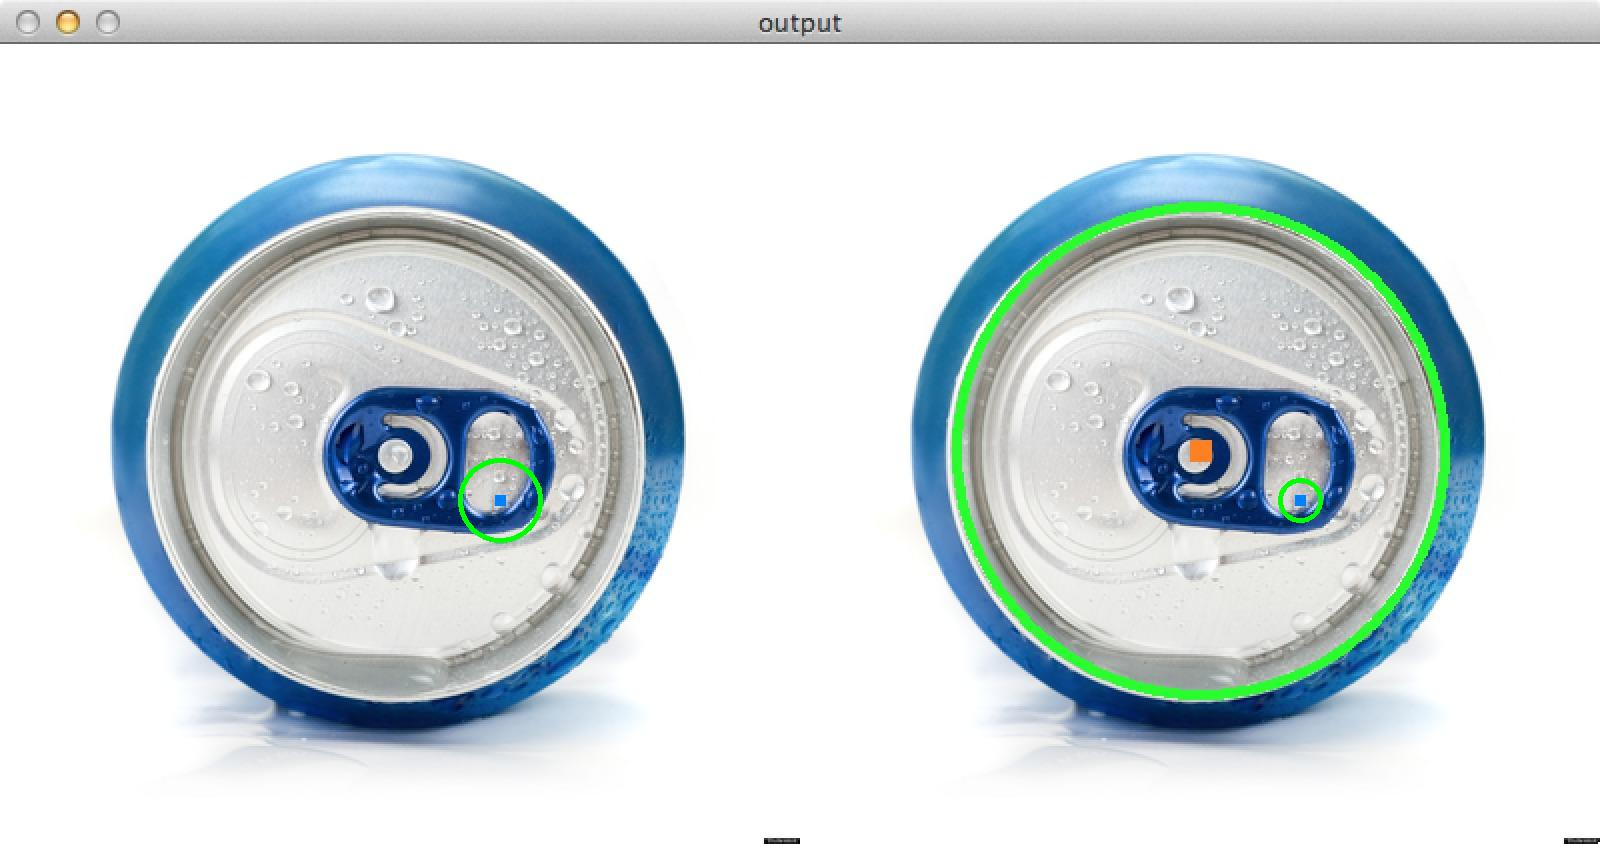

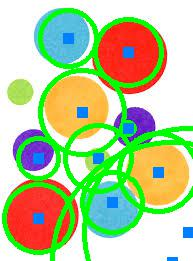

In [141]:
soda = imread("detect_circles_soda.jpg")
find_circles(soda)
circles = imread("circles.jpg")
find_circles(circles,10,15)

### Now lets try Messi

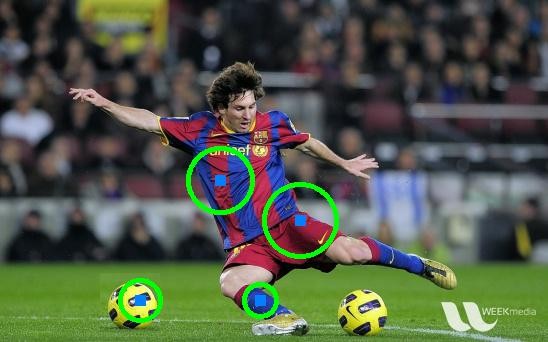

In [142]:
find_circles(messi,5,40)

# <font color='red'>   🤔 MMM. Not very impressive!!!   🤔</font>

# =====================================
# 2B - L3 Generalized Hough Transform
# =====================================

- **Non-analytic** models
    - Parameters express variation in pose or scale of fixed but arbitrary shape (that was then)
- **Visual code-word** based feature
    - Not edges but detected templates learned from models (this is "now")
    
## Training: build a Hough table

1. At each boundry point, compute displacement vector: 
    r = c - ${p}_{i}$
2. Measure the gradient angle $\theta$ at the bounary point
3. Store the displacement in a table indexed by $\theta$

<img src="snapshots/12.png" />

## Recognition

1. At each boundry point, measure the gradient angle $\theta$
2. Look up all displacements in $\theta$ displacement table. 
3. Vote for a center at each displacement.

<img src="snapshots/13.png" />



## Algorithm

If orientation is known:
- For each edge point:
    - Compute gradient direction $\theta$
    - Retrieve displacement vector r to vote for reference point.
- Peak in this Hough space (X,Y) is reference point with most supporting edges

If orientation is unknown:
- for each edge point
    - For each possible master $\theta$*
        - Compute gradient direction $\theta$
        - New $\theta$' = $\theta - \theta$* 
        - For $\theta$' retrieve displacement vectors to vote for reference point.
- Peak in this Hough space (now, X,Y,$\theta$\*) is reference point with most supporting edges 

If scale S is unknonw:
- for each edge point
    - For each possible master $\theta$*
        - Compute gradient direction $\theta$
        - For $\theta$' retrieve displacement vectors r.
            - Vote r scaled by S for reference point.
- Peak in this Hough space (now, X,Y,S) is reference point with most supporting edges 

## Application in Recognition

- Instead of indexing displacements by gradient orientation, index by "visual codeword"

<Figure size 432x288 with 0 Axes>

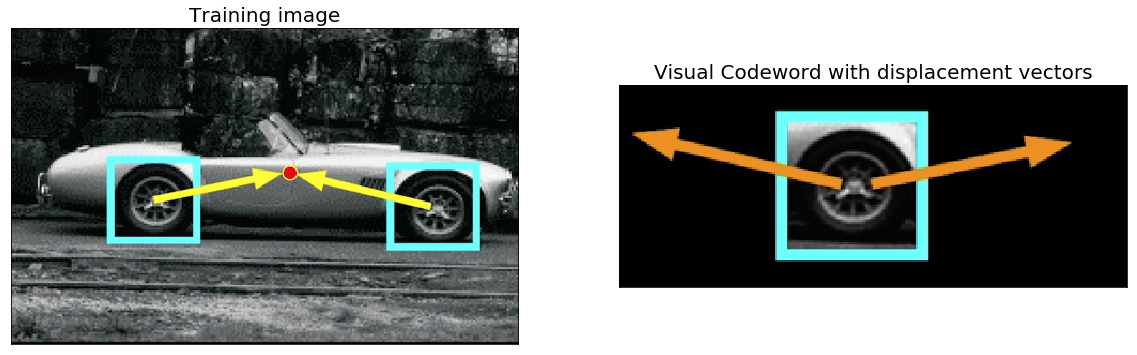

In [143]:
display_pair([imread("car.png"),imread("car_wheel.png")],
             ["Training image",
              "Visual Codeword with displacement vectors"])

## Training

1) Build codebook of patches around extracted interest points using clustering

<img src="snapshots/14.png" />



    - Take an image operator
    - Pull out all the interesting points on a bunch of training images
    - You collect the little image patch right around those points
    - You cluster them
    - The center of the clusters are referred to as visual codewords

### Training: Interest points

2) Map the patch around each ***interest point*** to closest codebook entry

<img src="snapshots/15.png" />



### Training: Displacements

3) For each codebook entry, store all displacements relative to object center

<img src="snapshots/16.png" />



## Run-Time

<img src="snapshots/17.png" />



To identify the car, and suppose we have only one feature (e.g. tire), than we find the place of the tires using the training codewords, and then use the displacement vectors associated with the best matched codewords to identify the point where most vectors point to. 


## Now lets bring magisterial Messi back (He scored 2  goals against Alave's two days ago in the first La-liga match 2018)


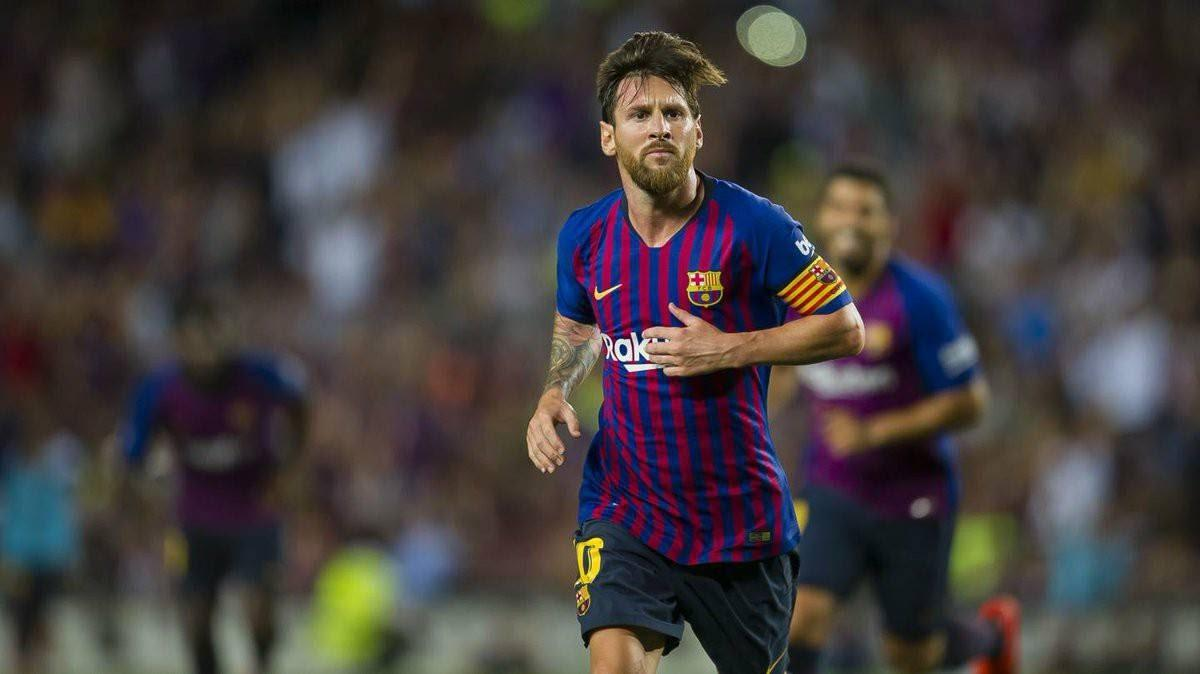

error: OpenCV(3.4.3) /Users/travis/build/skvark/opencv-python/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [145]:
def gen_sift_features(gray_img):
    sift = cv.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    fig, ax = plt.subplots()
    fig.set_size_inches(20,20)
    return ax.imshow(cv.drawKeypoints(gray_img, kp, color_img.copy()))

messi_alaves = imread("messi_alaves.jpg")
imshow(messi_alaves)
# generate SIFT keypoints and descriptors
messi_kp, messi_desc = gen_sift_features(gray(messi_alaves))

x,y,d = sobel(green(messi_alaves))
display_grid([green(messi_alaves),x,y,d],["original","sobel_x","sobel_y","sobel"])
print ('Here are what SIFT features look like for Messi vs Alaves image:')
show_sift_features(gray(messi_alaves), messi_alaves, messi_kp);



## Full Example: http://ianlondon.github.io/blog/how-to-sift-opencv/ 

# =====================================
# 2C - L1 Fourier transform
# =====================================

## Decomposing an image: Basis sets
A basis set is (edit from Wikipedia):
- A basis B of a **vector space** V is a **linearly independent** subset of V that **spans** V
<br />
<br />
Suppose that B = {v1,...,vn} is a finite subset of a vector space V over a **field** F (such as the **real** or **complex numbers** R or C). Then B is a basis if it satisfies the following conditions:

    - Linear independence: <br/>
        For all ${a}_{1}$,...,${a}_{n} \in$ F, if ${a}_{1}{v}_{1}$ + ...+ ${a}_{n}{v}_{n}$ = 0, then necessarily <br/> 
        ${a}_{1} = ...= {a}_{n} = 0$
        <br/><br/>
    - Spanning property,
        - For every $x$ in V it is possible to choose ${a}_{1}$,...,${a}_{n} \in F$ such that 
        ${x} = {a}_{1}{v}_{1} + ... + {a}_{n}{v}_{n} = 0$

## Images as points in a vector space

- Consider an image as a point in a NxN size space - can rasterize into a single vector
    
    $[{x}_{00},{x}_{10},{x}_{20},{x}_{(n-1)0},{x}_{01},...,{x}_{(n-1)(n-1)}]^T$
    <br/><br/>
- The "Normal" basis is just the vectors:
    $[0 0 0 0 ... 0 1 0 0 0 0 0 0 0 ... 0]^T$
    - Independent
    - Can create any image
    - Not very helpful

## A nice set of basis

<img src="snapshots/18.png" />

## Jean Baptiste Joseph Fourier (1768-1830)

Had crazy idea (1807):
   - Any periodic function can be rewritten as a weighted sum of sines and cosines of different frequencies
   
## A sum of sines

Our building block:

$ A*sin(\omega*x+\varphi)$

Add enough of them to get any signla f(x) you want

Text(0.5,1,'f0 + f1 + f2')

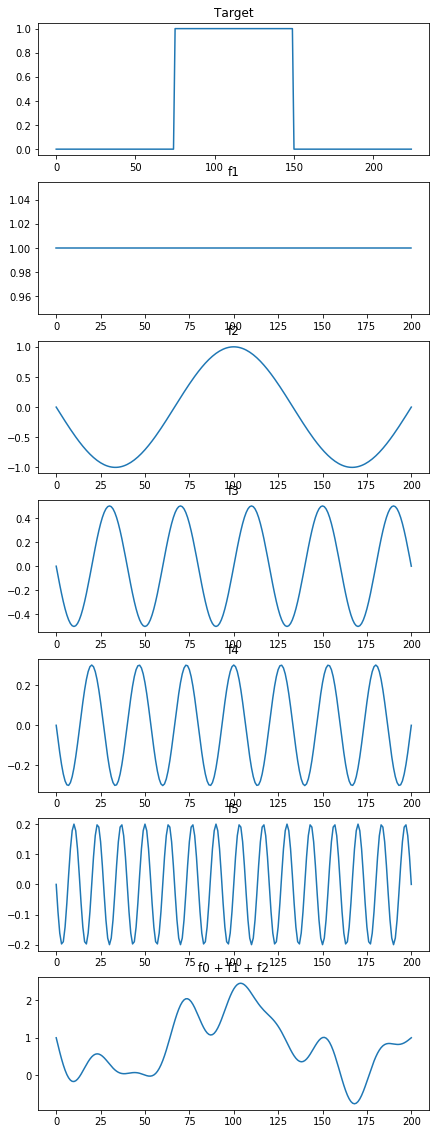

In [146]:
x = np.linspace(np.pi, 2*np.pi, 201)
fig, ax = plt.subplots(7,1)
fig.set_size_inches(7,20)
fs = [
    lambda i: 1,
    lambda i: np.sin(3*i),
    lambda i: 0.5*np.sin(10*i+np.pi),
    lambda i: 0.3*np.sin(15*i),
    lambda i: 0.2*np.sin(30*i+np.pi)
]
ax[0].plot([0]*75+[1]*75+[0]*75)
ax[0].set_title("Target")
c = 1
for f in fs:
    ax[c].plot([f(xi) for xi in x])
    ax[c].set_title("f%d" % c)
    c+= 1

ax[6].plot([sum([f(xi) for f in fs[:-1]]) for xi in x])
ax[6].set_title("f%d + f%d + f%d" % (0,1,2))

## Frequency Spectra- Series

Text(0.5,1,'One form of spuctrum')

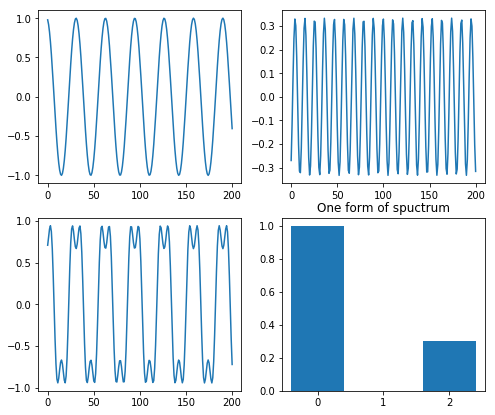

In [147]:
at = lambda f,t: np.sin(2*np.pi*f*t) 
bt = lambda f,t: 0.333*np.sin(2*np.pi*3*f*t)
gt = lambda f,t: at(f,t) + bt(f,t)


x = np.linspace(np.pi, 2*np.pi, 201)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(8,7)
ax[0,0].plot([at(2,xi) for xi in x])
ax[0,1].plot([bt(2,xi) for xi in x])
ax[1,0].plot([gt(2,xi) for xi in x])
ax[1,1].bar([0,1,2],[1,0,0.3])
ax[1,1].set_title("One form of spuctrum")

<center>
<font size="6px">
            $A*\sum_{k=1}^{\infty}{\frac{1}{k}}sin(2*\pi*k*t) $
</font>
</center>

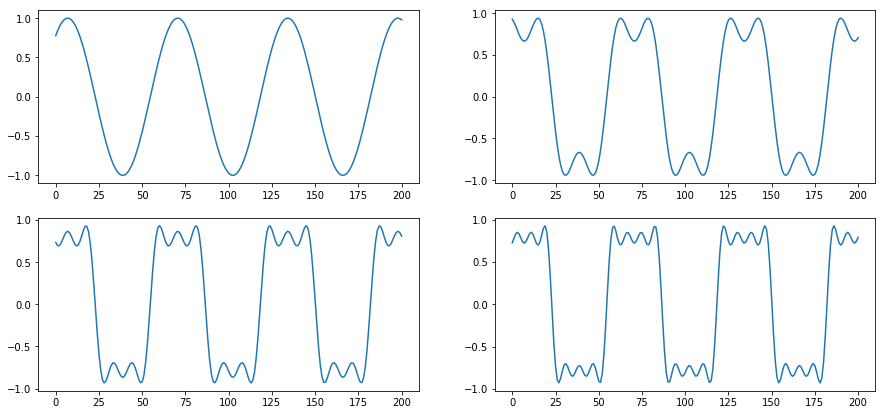

In [148]:
at = lambda t,k: + (1.0/k)*np.sin(2*np.pi*k*t)
Ampl = 1
x = np.linspace(np.pi, 2*np.pi, 201)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,7)
pis = [(0,0),(0,1),(1,0),(1,1)]
for i in range(1,5):
    y = np.array([at(xi,1) for xi in x])
    for k in range(1,i):      
        y += Ampl*np.array([at(xi,2*k+1) for xi in x])
    ax[pis[i-1][0],pis[i-1][1]].plot(y)

Text(0.5,0,'frequency')

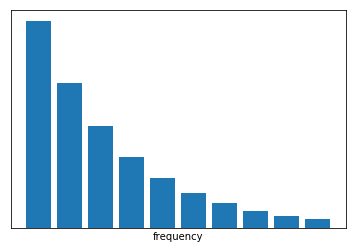

In [149]:
plt.bar(np.arange(10),[0.7**x for x in np.arange(10)])
ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel("frequency")

## Fourier Transform
We want to understand the frequency $\omega$ of our signal. So, lets reparametrize the signal by $\omega$ insead of x: <br/><br/>

f(x) ----> [Fourier Transform] -----> F($\omega$)<br/>
                                Asin($\omega$x + $\phi$)
                                
For every $\omega$ from 0 to $\infty$ (actually -$\infty$ to $\infty$), F($\omega$) holds the amplitude A and phase ***f*** of the corresponding sinusoid<br/><br/>

How can F hold both amplitude and phase?
<br/>Complex number trick!


<center>$F(\omega) = R(\omega) + iI(\omega)$</center>

<center>$A = ± \sqrt{R(\omega)^2 + I(\omega)^2}$</center>
<center>$\phi = tan^{-1}\frac{I(\omega)}{R(\omega)}$

## Computing FT: Just a basis

The infinite integral of the product of two sinusoids of different frequency is zero. (Why?) <br/><br/>

<font size="4px"><center>$\int_{-\infty}^\infty sin(ax + \phi)sin(bx + \varphi)dx = 0, if a\neq b$</center></font>

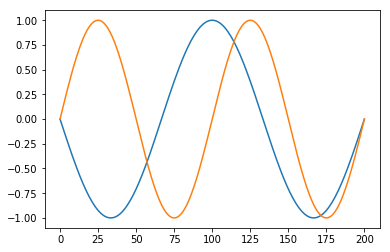

In [150]:
f1 = lambda i: np.sin(3*i)
f2 = lambda i: np.sin(4*i)
x = np.linspace(np.pi, 2*np.pi, 201)
plt.plot([f1(xi) for xi in x])
plt.plot([f2(xi) for xi in x])

And if same frequency the integral is infinite: <br/><br/>

<font size="4px"><center>$\int_{-\infty}^\infty sin(ax + \phi)sin(bx + \varphi)dx = ± \infty, if a\neq b$</center></font><br/><br/>

... if $\phi$ and $\varphi$ not exactly $\frac{\pi}{2}$ out of phase (sin anc cos)<br/><br/>

So, suppose f(x) is a cosine wave of freq $\omega$: <br/><br/>

<center>$f(x) = cos(2\pi\omega x)$</center> <br/>
Then: 
$$C(u) = \int_{-\infty}^\infty f(x)cos(2\pi u x) dx$$

which is infinite if u is equal to $\omega$ or $-\omega$ and zero otherwise

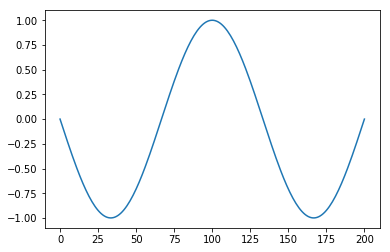

In [151]:
omega = 10
x = 10
f = lambda i: np.cos(2*np.pi*omega*x)
x = np.linspace(np.pi, 2*np.pi, 201)
plt.plot([f1(xi) for xi in x])
ax = plt.gca()


- We can do that for all frequecncies u
- But we'd have to do that for all phases, don't we???
- No! Any phase can be created by a weighted sum of cosine and sine. Onle need each piece

$$C(u) = \int_{-\infty}^\infty f(x)cos(2\pi u x) dx$$
$$S(u) = \int_{-\infty}^\infty f(x)sin(2\pi u x) dx$$

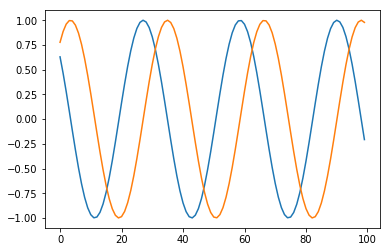

In [152]:
omega = 1
f1 = lambda i: np.cos(2*np.pi*omega*i)
f2 = lambda i: np.sin(2*np.pi*omega*i)
x = np.linspace(np.pi, 2*np.pi, 100)
plt.plot([f1(xi) for xi in x])
plt.plot([f2(xi) for xi in x])
ax = plt.gca()


## Fourier Transform - more formally
Represent the signal as an infinite weighted sum of an infinite number of sinusoids:

$$C(u) = \int_{-\infty}^\infty f(x)e^{-i2\pi u x} dx$$
<center>$ e^{ik} = cos(k) + i*sin(k)$ $ i=\sqrt{-1}$</center>


Spatial Domain(x) ---> Frequency Domain ($\omega$ or u or even s)
Frequency Spectrum F(u) or F($\omega$)

## Inverse Fourier Transform (IFT)

$$f(x) = \int_{-\infty}^\infty F(u)e^{i2\pi u x} du$$



<img src="snapshots/19.png" />
<img src="snapshots/20.png" />

## Fourier Transform - limitations

- The integral $\int_{-\infty}^\infty f(x)e^{-i2\pi u x} dx$ exists if the function f is integrable:
<br/>
$$\int_{-\infty}^\infty | f(x) | dx < \infty$$
- If there is a bound of width T outside of which f is zero than obviosly could integrate from just $-\frac{T}{2}$ to $\frac{T}{2}$

## The Discrete Fourier Transform 

$$F(k) = \frac{1}{N} \sum_{x=0}^{x=N-1}f(x)e^\frac{-i2\pi k x}{N} $$

... where x is discrete and goes from the start of the signal to the end (N-1)
... and k is the number "cycles per period of the signal" or "cycles per image.

Only makes sense k = $\frac{N}{2}$ to $\frac{N}{2}$ why? What's highest frequency you can unambiguously have in a discrete image?

## 2D Fourier Transforms

- The two dimensional version:.

$$F(u,v) = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)e^{-i2\pi ux  + vy} dx dy$$

- And the 2D Discrete FT:
$$F(k_x,k_y) = \frac{1}{N} \sum_{x=0}^{x=N-1}\sum_{y=0}^{y=N-1} f(x)e^\frac{-i2\pi(k_x x + k_y y)}{N} $$

- Works best when you put the origin of k in the middle

## Examples

<Figure size 432x288 with 0 Axes>

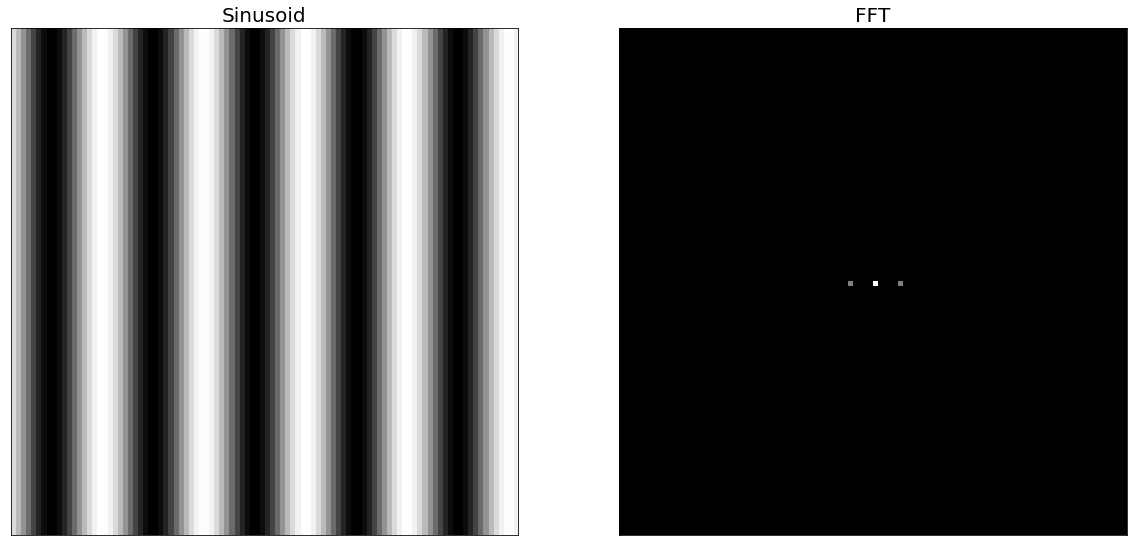

In [153]:
%matplotlib inline
def normalize_img(s):
    start = 0
    end = 255
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res
A = .8
f = 5
t = np.arange(0,1,.01)
phi = np.pi/4
x = normalize_img(A*np.cos(2*np.pi*f*t + phi))
sinusoid = np.array([x]*len(t)).astype(np.uint8)

f = np.fft.fft2(sinusoid)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)

display_pair([sinusoid,magnitude_spectrum],["Sinusoid","FFT"])

<Figure size 432x288 with 0 Axes>

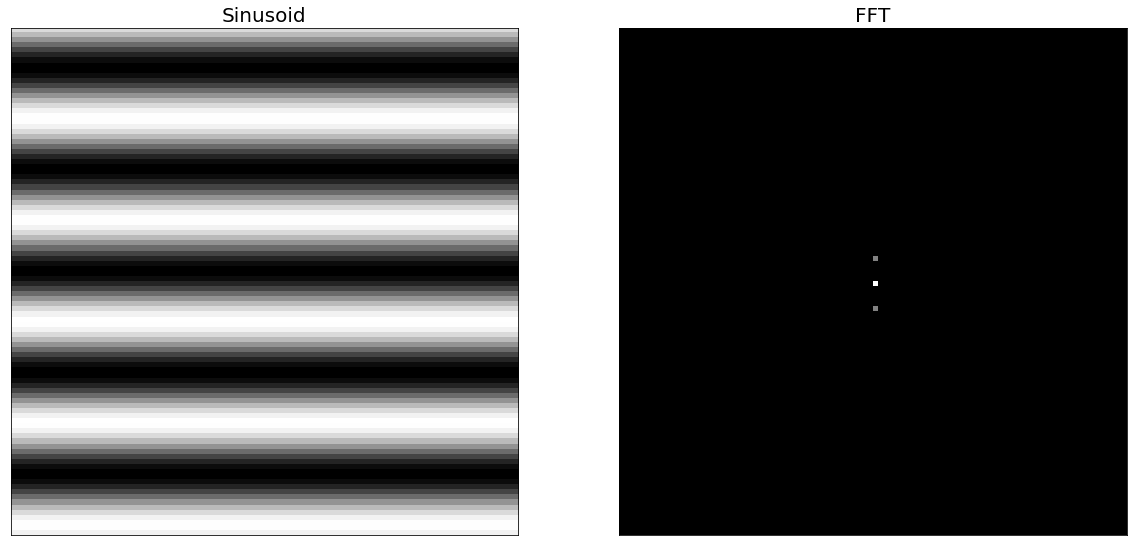

In [154]:
st = sinusoid.transpose()
f = np.fft.fft2(st)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)

display_pair([st,magnitude_spectrum],["Sinusoid","FFT"])

## Linearity of Sum

<Figure size 432x288 with 0 Axes>

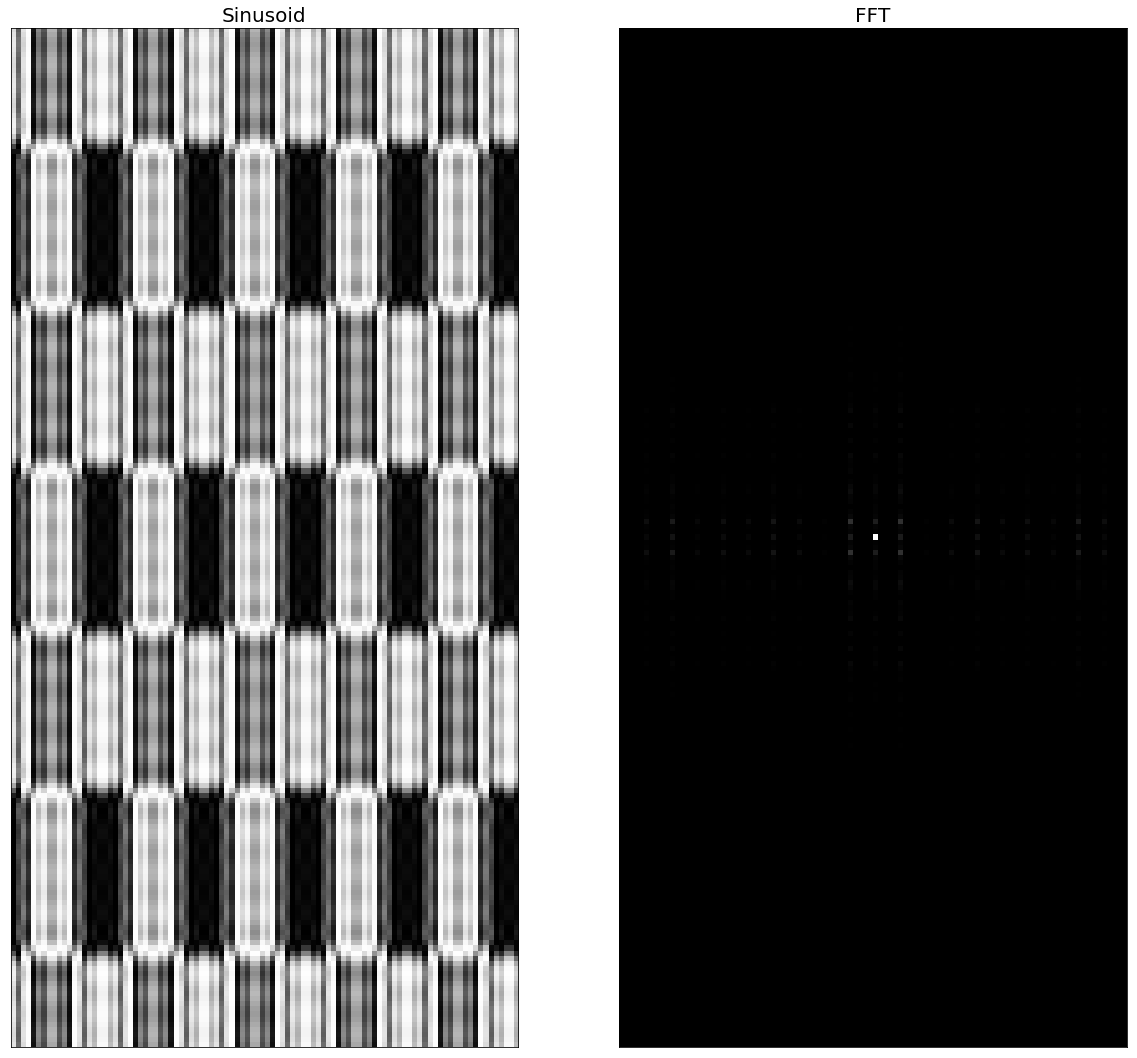

<Figure size 432x288 with 0 Axes>

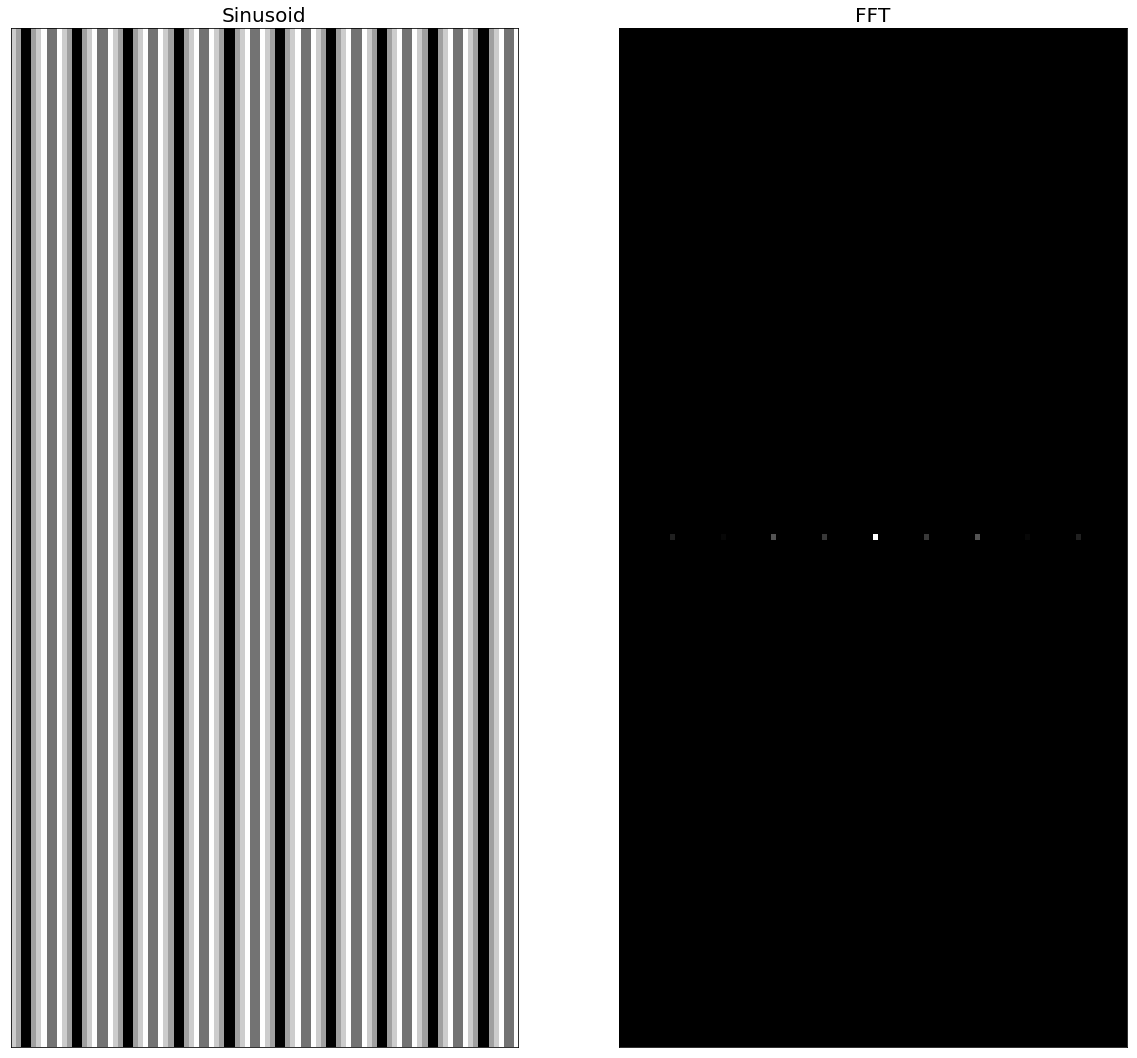

<Figure size 432x288 with 0 Axes>

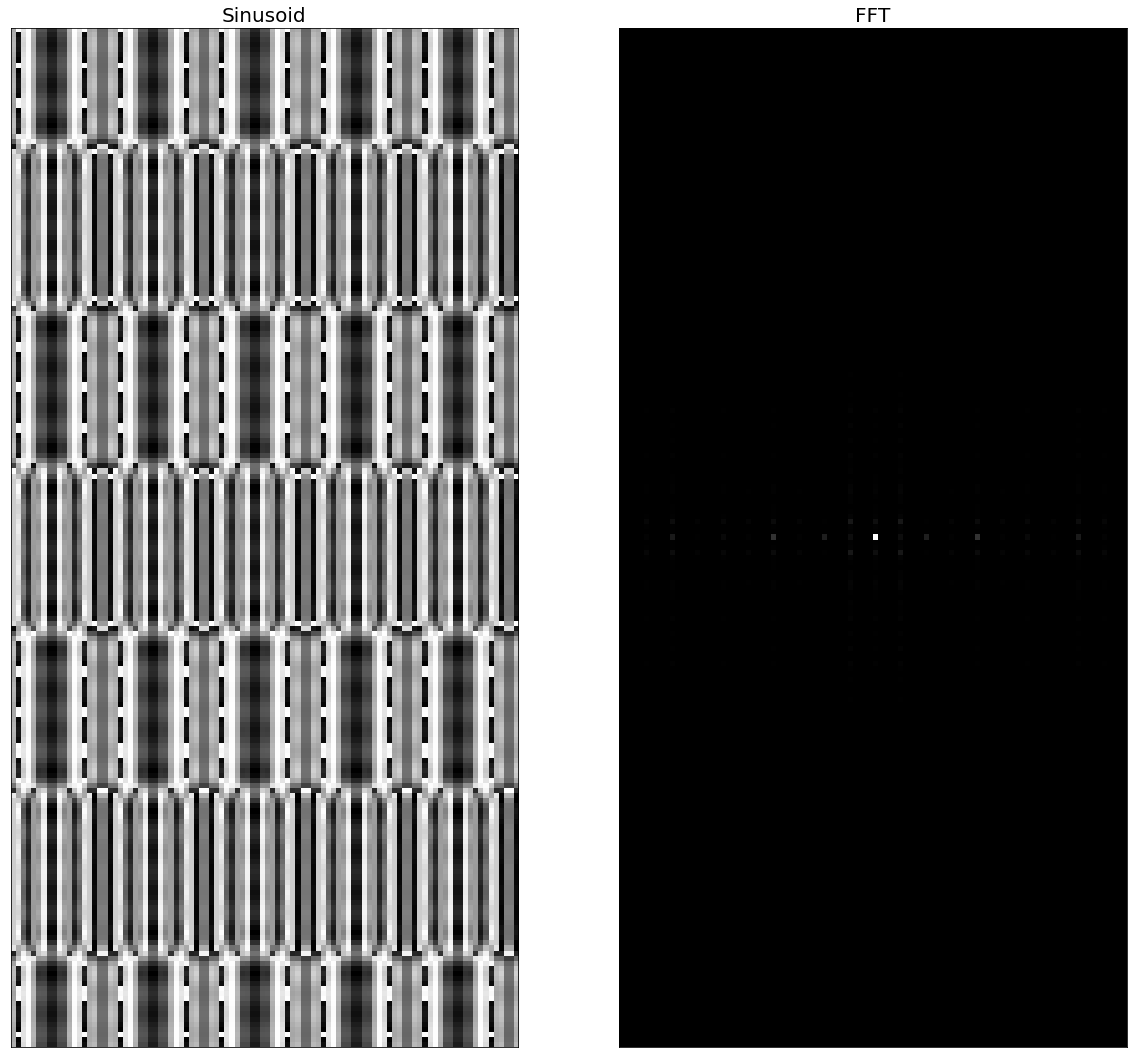

In [155]:
A = .8
f = 5
fx=1/20.0
fy=1/20.0
t = np.arange(0,1,.01)
phi = np.pi/4
s = lambda i,j : A*np.cos(2*np.pi*f*(fx*i+fy*j))

sinusoid1 = normalize_img(np.array([[s(i,j) for i in x] for j in y])).astype(np.uint8)
ft = np.fft.fft2(sinusoid1)
fshift = np.fft.fftshift(ft)
ms1 = np.abs(fshift)

f = 20
f = 5
fx=1/10.0
fy=0
s = lambda i,j : A*np.sin(2*np.pi*f*(fx*i+fy*j))
sinusoid2 = normalize_img(np.array([[s(i,j) for i in x] for j in y])).astype(np.uint8)
ft = np.fft.fft2(sinusoid2)
fshift = np.fft.fftshift(ft)
ms2 = np.abs(fshift)


display_pair([sinusoid1,ms1],["Sinusoid","FFT"])
display_pair([sinusoid2,ms2],["Sinusoid","FFT"])
display_pair([sinusoid1+sinusoid2,ms1+ms2],["Sinusoid","FFT"])


## Now lets bring magisterial Messi back (Tomorrow playing against Valladolid)


<Figure size 432x288 with 0 Axes>

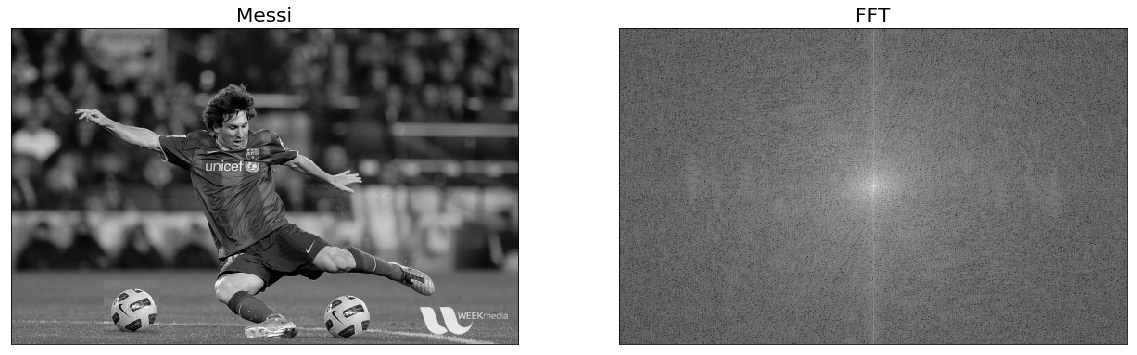

In [156]:
ft = np.fft.fft2(gray(messi))
fshift = np.fft.fftshift(ft)
ms = 20*np.log(np.abs(fshift))
ms = normalize_img(ms).astype(np.uint8)
display_pair([gray(messi),ms],["Messi","FFT"])

# <font color='red'>    🤩 He is A Gamma Ray Burst!!!    🤩</font>

\***More examples in the licture**

Lets create some functions

In [157]:
def normalize_img(s):
    start = 0
    end = 255
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res
def fft(img):
    ft = np.fft.fft2(img)
    fshift = np.fft.fftshift(ft)
    ms = 20*np.log(np.abs(fshift))
    ms = normalize_img(ms).astype(np.uint8) 
    return ms
def hpfm(img):
    rows, cols = img.shape
    crow,ccol = rows/2 , cols/2
    ft = np.fft.fft2(gray(messi))
    fshift = np.fft.fftshift(ft)
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back    

In [158]:
display_pair([gray(messi),hpfm(gray(messi))],["Messi","High Pass Filter (Edge)"])

TypeError: slice indices must be integers or None or have an __index__ method

# =====================================
# 2C - L2 Convolution in frequency domain
# =====================================

In [ ]:
"""
The sine wave is important in physics because it retains 
its wave shape when added to another sine wave of the same frequency 
and arbitrary phase and magnitude. It is the only periodic waveform 
that has this property. This property leads to its importance in Fourier 
analysis and makes it acoustically unique.
"""
sin = lambda t,k,A,phi: + A*np.sin(2*np.pi*k*t + phi)
x = np.linspace(np.pi, 2*np.pi, 201)
fig,ax = plt.subplots(2,1)
ax[0].plot([sin(xi,2,1,0) for xi in x])
ax[0].plot([sin(xi,2,1,0) + sin(xi,2,2,1)  for xi in x])
ax[1].plot([sin(xi,2,1,0) for xi in x])
ax[1].plot([sin(xi,2,1,0) + sin(xi,1,1,0)  for xi in x])

## Fourier Transform and Convolution

Let g = f * h <br/>
then,

$$G(u) = \int_{-\infty}^\infty g(x)e^{-i2\pi u x} dx$$

$$= \int_{-\infty}^\infty \int_{-\infty}^\infty f(\tau)h(x-\tau)e^{-i2\pi ux} d\tau x$$

$$= \int_{-\infty}^\infty \int_{-\infty}^\infty [f(\tau)e^{-i2\pi ux} d\tau][h(x-\tau)e^{-i2\pi u(x-\tau)} dx]$$

$$= \int_{-\infty}^\infty [f(\tau)e^{-i2\pi ux} d\tau]\int_{-\infty}^\infty[h(x')e^{-i2\pi u(x')} dx']$$
$$= F(u)H(u)$$

<br/>
<center>**Convolution in spation domain <==> Multiplication in frequency domain**</center>


<table>
  <tr>
    <th>Spatial Domain (x)</th>
    <th></th>
    <th style="text-align:left">Frequency Domain(u)</th>
  </tr>
  <tr>
    <td>g = f \* h</td>
    <td>&lt;----&gt;</td>
    <td style="text-align:left">G = F $\cdot$ H</td>
  </tr>
  <tr>
    <td>g = f $\cdot$ h</td>
    <td>&lt;----&gt;</td>
    <td style="text-align:left">G = F \* H</td>
  </tr>
</table>

## Example use: Smooting/Blurring

- We want a smoothed function of f(x)

$$g(x) = f(x) * h(x)$$

- We can use a Gaussian kernal
    
$$h(x) = \frac{1}{\sqrt{2\pi \sigma}}e^{-\frac{x^2}{2\sigma^2}}$$

- The Fourier transform of a Gaussian is a Gaussian

$$H(x) = e^{-\frac{(2\pi u)^2\sigma^2}{2}}$$

- Convolution in space is multiplication in freq:
$$G(u) = F(u) \cdot H(u)$$


In [ ]:
import scipy.ndimage.filters as filter
from scipy.signal import convolve2d
from IPython.display import HTML


def normalize(s):
    start = 0.0
    end = 255.0
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res.astype(np.uint8)

def display_triple(imgs,titles):
    plt.gray()
    plt.figure(figsize=(20,20))
    
    plt.subplot(131)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.imshow(imgs[0])
    plt.title(titles[0], size=20)
    if len(imgs)> 1:
        plt.subplot(132)
        plt.imshow(imgs[1])
        plt.title(titles[1], size=20)
    if len(imgs)> 2:
        plt.subplot(133)
        plt.imshow(imgs[2])
        plt.title(titles[2], size=20)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())   
    plt.show()
    
rows, cols = gray(messi).shape
    

n = 15
kernal = np.ones((n,n))
#kernal /= np.sum(kernal)


conv = convolve2d(gray(messi), kernal, mode='same')

display(HTML('<strong><span style="color:green">Using convolution</span></strong><br/>'))

display_pair([gray(messi),conv],["Original","Filtered"])



messi_dft = cv.dft(np.float32(gray(messi)),flags = cv.DFT_COMPLEX_OUTPUT)
messi_dft_shift = np.fft.fftshift(messi_dft)
messi_ms = normalize(20*np.log(cv.magnitude(messi_dft_shift[:,:,0],messi_dft_shift[:,:,1])))


# create a mask first, center square is 1, remaining all zeros
crow,ccol = int(rows/2) , int(cols/2)
mask = np.zeros((rows,cols,2),np.float32)
n = 7
mask[crow-n:crow+n, ccol-n:ccol+n] = 1.0
mask_dft = cv.dft(np.float32(mask),flags = cv.DFT_COMPLEX_OUTPUT)
mask_dft_shift = np.fft.fftshift(mask_dft)
mask_ms = normalize(cv.magnitude(mask_dft_shift[:,:,0],mask_dft_shift[:,:,1]))


display(HTML('<strong><span style="color:green">Using FFT</span></strong><br/>'))
# Multiplying filter with messi_dft
mul = messi_dft_shift*mask_dft_shift
mul_ms = normalize(cv.magnitude(mul[:,:,0],mul[:,:,1]))
display_triple([messi_ms,mask_ms,mul_ms],["|F(u,v)|","|H(Sx,Sy)|", "|G(Sx,Sy)|"])


# reversing image
f_ishift = np.fft.ifftshift(mul)
img_back = cv.idft(f_ishift)
img_back = np.fft.ifftshift(img_back)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
display_pair([gray(messi),img_back],["Original","Filtered"])

### Low and High Pass filtering

In [ ]:
display_pair([gray(messi),messi_ms],["Spatial Domain","Frequency Domain"])
display(HTML('<strong><span style="color:green">Low Passing Filter</span></strong><br/>'))

def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

def reverse_fft(fft_img):
    
    f_ishift = np.fft.ifftshift(fft_img)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

h,w = messi_ms.shape
center = [int(w/2), int(h/2)]
mask = createCircularMask(h, w, center=center,radius=40)
masked_img = messi_dft_shift.copy()
masked_img[~mask] = 0
dis_masked_img = messi_ms.copy()
dis_masked_img[~mask] = 0
display_pair([messi_ms,dis_masked_img],["FFT Domain","Low Pass Filter"])
display(HTML('<strong><span style="color:red">Notice the ringing as in the licture</span></strong><br/>'))
display_triple([gray(messi),dis_masked_img,reverse_fft(masked_img)],
               ["Original","FFT LPF","Ringed Image"])


display(HTML('<strong><span style="color:green">High Passing Filter</span></strong><br/>'))

masked_img[mask] = 0
masked_img = messi_dft_shift.copy()
masked_img[mask] = 0
dis_masked_img = messi_ms.copy()
dis_masked_img[mask] = 0
display_pair([messi_ms,dis_masked_img],["FFT Domain","High Pass Filter"])
display(HTML('<strong><span style="color:red">High Pass Filter is edge detection</span></strong><br/>'))
display_triple([gray(messi),dis_masked_img,reverse_fft(masked_img)],
               ["Original","FFT LPF","HPF Image"])

## Properties of Fourier Transform


<table>
  <tr>
    <th></th>
    <th>Spatial Domain (x)</th>
    <th></th>
    <th style="text-align:left">Frequency Domain(u)</th>
  </tr>
  <tr>
    <td>Linearity</td>
    <td>$$c_1f(x) + c_2g(x)$$</td>
    <td></td>
    <td style="text-align:left">$$c_1F(u) + c_2G(u)$$</td>
  </tr>
  <tr>
    <td>Convolution</td>
    <td>$$f(x)g(x)$$</td>
    <td></td>
    <td style="text-align:left">$$F(u)G(u)$$</td>
  </tr>
  <tr>
    <td>Scaling</td>
    <td>$$f(ax)$$</td>
    <td>Shrink&lt;----&gt;Stretch</td>
    <td style="text-align:left">$$\frac{1}{|a|}F(\frac{u}{a})$$</td>
  </tr>
   <tr>
    <td>Differentiation</td>
    <td>$$\frac{d^nf(x)}{dx^n}$$</td>
    <td></td>
    <td style="text-align:left">$$(i2\pi u)''F(u)$$</td>
  </tr>
</table>

## Fourier Pairs


<img src="snapshots/21.png" />



# =====================================
# 2C - L3 Aliasing
# =====================================

## Fourier Transform Sampling Pairs

A fourier transform of pulse train is another pulse train. 

A pulse train is comb function in the form

$$\sum_{n=-\infty}^{\infty}\delta(x-nx_0) $$ 

and its transform function is 

$$\frac{1}{x_0}\sum_{n=-\infty}^{\infty}\delta(\epsilon-\frac{n}{x_0}) $$ 

## Sampled representation

<img src="snapshots/22.png" />



**How to store and compute with continuous functions?**

<font color="blue" >Sampling</font>

Text(0.5,1,'Sampled')

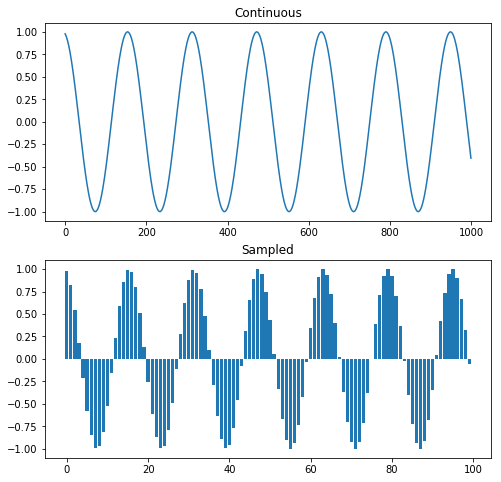

In [159]:
%matplotlib inline
sin = lambda t,k,A,phi: + A*np.sin(2*np.pi*k*t + phi)
x = np.linspace(np.pi, 2*np.pi, 1000)
y = [sin(xi,2,1,0) for xi in x]
sampled = [y[i] for i in range(0,1000,10)]
fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,8)
ax[0].plot(y)
ax[0].set_title("Continuous")
ax[1].bar(np.arange(len(sampled)),sampled)
ax[1].set_title("Sampled")

<font color="blue" >Reconstructing</font>

- Making samples back into a continuous function
    - for output (need realizable method)
    - for analysis or processing (need mathematical)
- Amounts to "guessing" what the function did between

Text(0.5,1,'Continous')

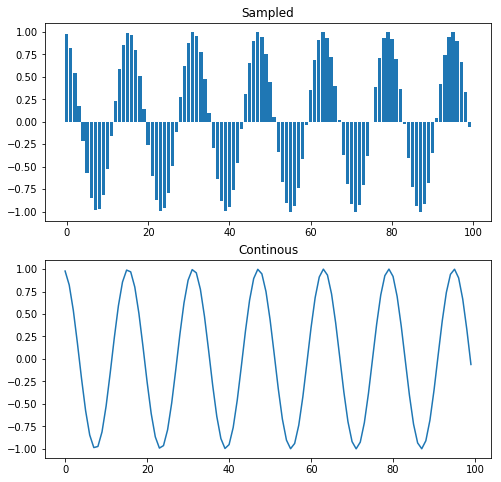

In [160]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,8)
ax[0].bar(np.arange(len(sampled)),sampled)
ax[0].set_title("Sampled")
ax[1].plot(sampled)
ax[1].set_title("Continous")

### Example Audio

chirp 

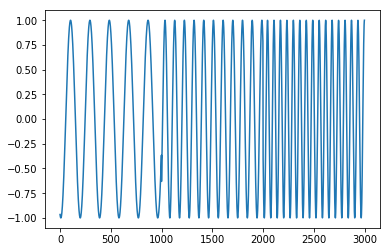

In [161]:
sin = lambda t,k,A,phi: + A*np.sin(2*np.pi*k*t + phi)
x = np.linspace(np.pi, 2*np.pi, 3000)
chirp = [sin(xi,5,1,0) for xi in x[:1000]] + [sin(xi,10,1,0) for xi in  x[1000:2000]] + [sin(xi,15,1,0) for xi in x[2000:3000]]
plt.plot(chirp)

**Sampling in digital audio**

- Recording: sound to analog to samples to disk
- Playback: disk to samples to analog to sound again

<img src="snapshots/23.png" />

## undersampling

- Unsurprising results: information is lost
- Surprising results: indistinguishable from lower frequency ***(not shown below because plots are not smooth)***

Text(0.5,1,'Sampled every 100')

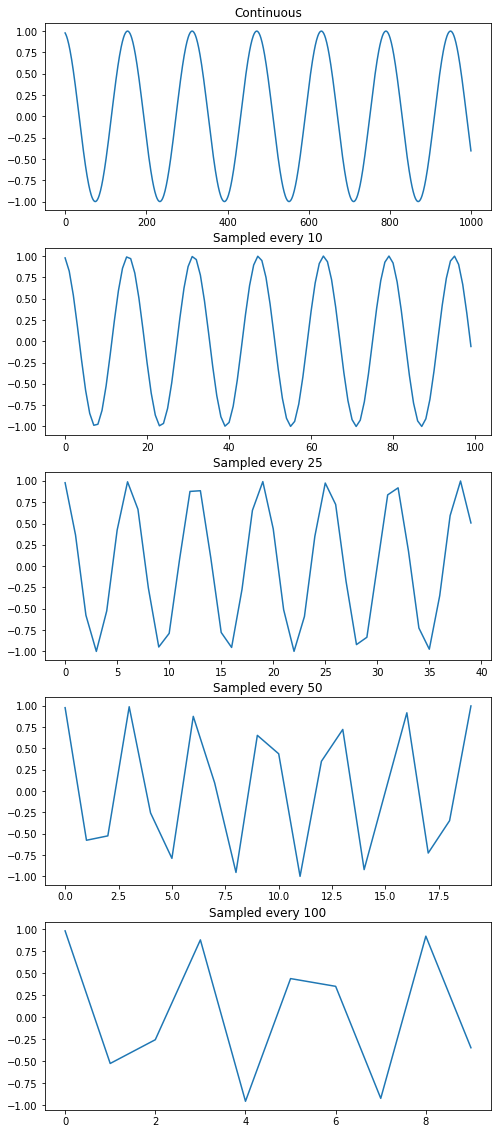

In [162]:
%matplotlib inline
sin = lambda t,k,A,phi: + A*np.sin(2*np.pi*k*t + phi)
x = np.linspace(np.pi, 2*np.pi, 1000)
y = [sin(xi,2,1,0) for xi in x]
fig,ax = plt.subplots(5,1)
fig.set_size_inches(8,20)
ax[0].plot(y)
ax[0].set_title("Continuous")
ax[1].plot([y[i] for i in range(0,1000,10)])
ax[1].set_title("Sampled every 10")
ax[2].plot([y[i] for i in range(0,1000,25)])
ax[2].set_title("Sampled every 25")
ax[3].plot([y[i] for i in range(0,1000,50)])
ax[3].set_title("Sampled every 50")
ax[4].plot([y[i] for i in range(0,1000,100)])
ax[4].set_title("Sampled every 100")

<font color="red"> **Aliasing:** </font> signals "traveling in disguise" as other frequencies

## Aliasing in images

<img src="disintegrating_texture.png" />

- The checkboard supposed to get thinner and closer as we move further, but at the far end it breaks up. This is aliasing where samples is not enough to reconstruct the signal



Text(0.5,1,'Plot as image')

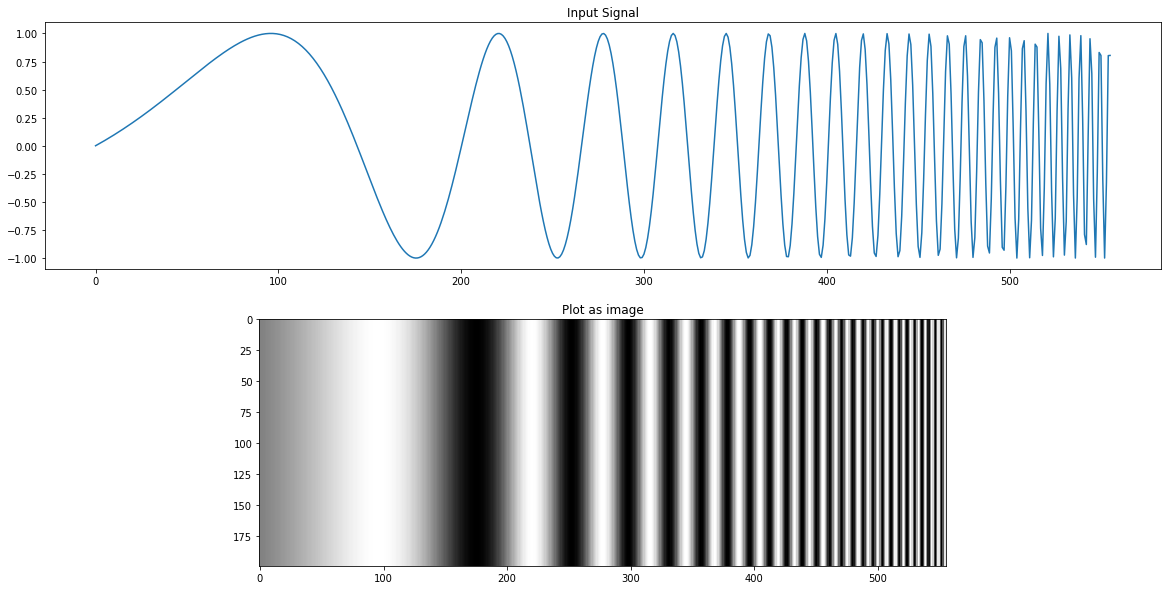

In [163]:
chirp = lambda x: np.sin((2**x)*x)
x = np.arange(0,5,0.009)
y = np.array([chirp(xi) for xi in x])

fig,ax = plt.subplots(2,1)
fig.set_size_inches(20,10)
ax[0].plot(y)
ax[0].set_title("Input Signal")
ax[1].imshow(np.array([y]*200))
ax[1].set_title("Plot as image")

Notice at the end where the frequecncy gets really high, there are no enough samples to reconstruct the correct signal and thus we see aliasing

## Antialiasing (prevent aliasing)

- Sample more often
    - Join the Mega-Pixel craze of the photo industry
    - But this can't go on forever
- Make the signal less "wiggly"
    - Get rid of some high frequencies
    - Will lose information
    - But it's better than aliasing

For instance, in audio decoding and encoding, to prevent aliasing, we can introduce lowpass filters:
- Remove high frequencies leaving only safe, low frequencies to be reconstructed

<img src="snapshots/25.png" />


## Impulse Train

Define a comb function (impulse train) in 1D as follows

$$ comb_M[x] = \sum_{k=-\infty}^{\infty}\delta[x - kM]$$

where $M$ is an integer, and $\delta$ function is a function that is 1 when its argument is zero and 0 otherwise. What this function means is that as k goes from minus infinity to infinity, x every M would be a one. So if $M$ is 2, than every 2 there is a one like below

<img src="snapshots/26.png" />  

## FT of Impulse Train in 1D

<img src="snapshots/27.png" />  


## Impulse in 2D (bed of nails)

$$ comb_{M,N}(x,y) = \sum_{k=-\infty}^{\infty}\sum_{l=-\infty}^{\infty}\delta(x-kM, y-lN)$$

The Fourier Transform of an impulse train is also an impulse train

$$ comb_{\frac{1}{M},\frac{1}{N}}(u,v) = \sum_{k=-\infty}^{\infty}\sum_{l=-\infty}^{\infty}\delta(u-\frac{k}{M},v-\frac{l}{N})$$

As the comb samples get further apart, the spectrum samples get closer together

## Sampling low frequency signal

<img src="snapshots/28.png" />  

Sampling is just the multiplication of the signal with a comb function in the spatial domain. And in the frequency domain it is the convolvement with the comb function


If the maximum frequency of the signal is *small enough*, than we can use one cone of the comb function to reconstruct the signal

<img src="snapshots/29.png" />  

If the maximum frequency $W$ is less than $\frac{1}{2M}$, the original signal can be recovered from its samples by low-pass filtering

<img src="snapshots/30.png" />  

Text(0.5,1,'Sampled')

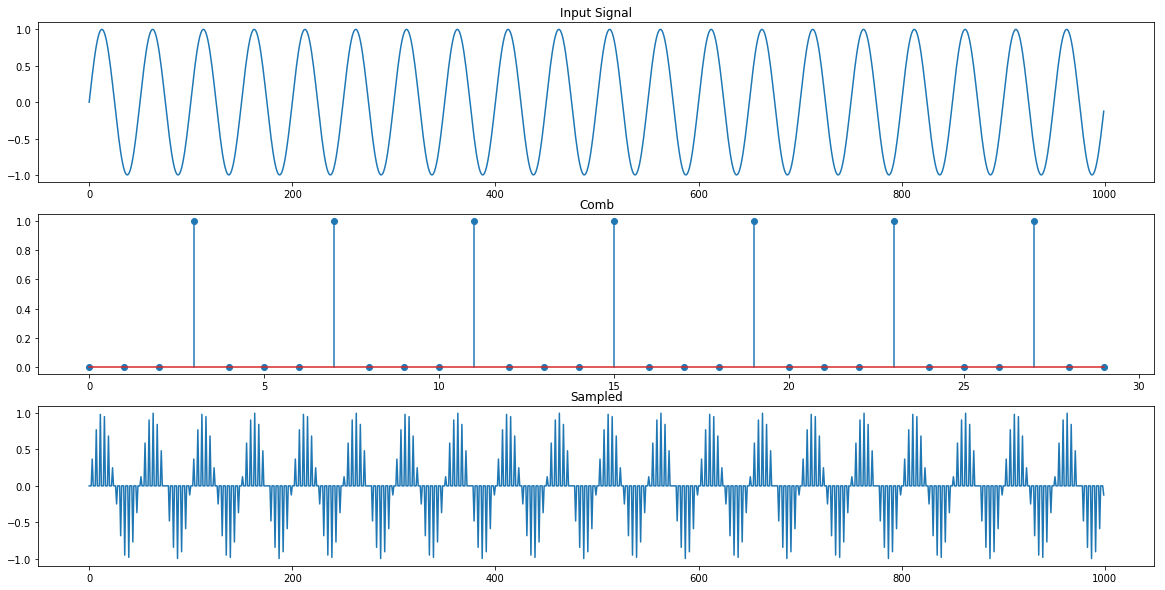

In [164]:
from scipy import signal

time_step = 0.02
period = 1.
x = np.arange(0, 20, time_step)
y = np.sin(2 * np.pi / period * x)

fig,ax = plt.subplots(3,1)
fig.set_size_inches(20,10)
ax[0].plot(y)
ax[0].set_title("Input Signal")
spacing = 4
comb = np.tile(signal.unit_impulse(spacing,spacing-1),int(y.size/spacing))

ax[1].stem(np.arange(30),comb[:30])
ax[1].set_title("Comb")

mul = y*comb
ax[2].plot(mul)
ax[2].set_title("Sampled")

NameError: name 'unit_impulse' is not defined

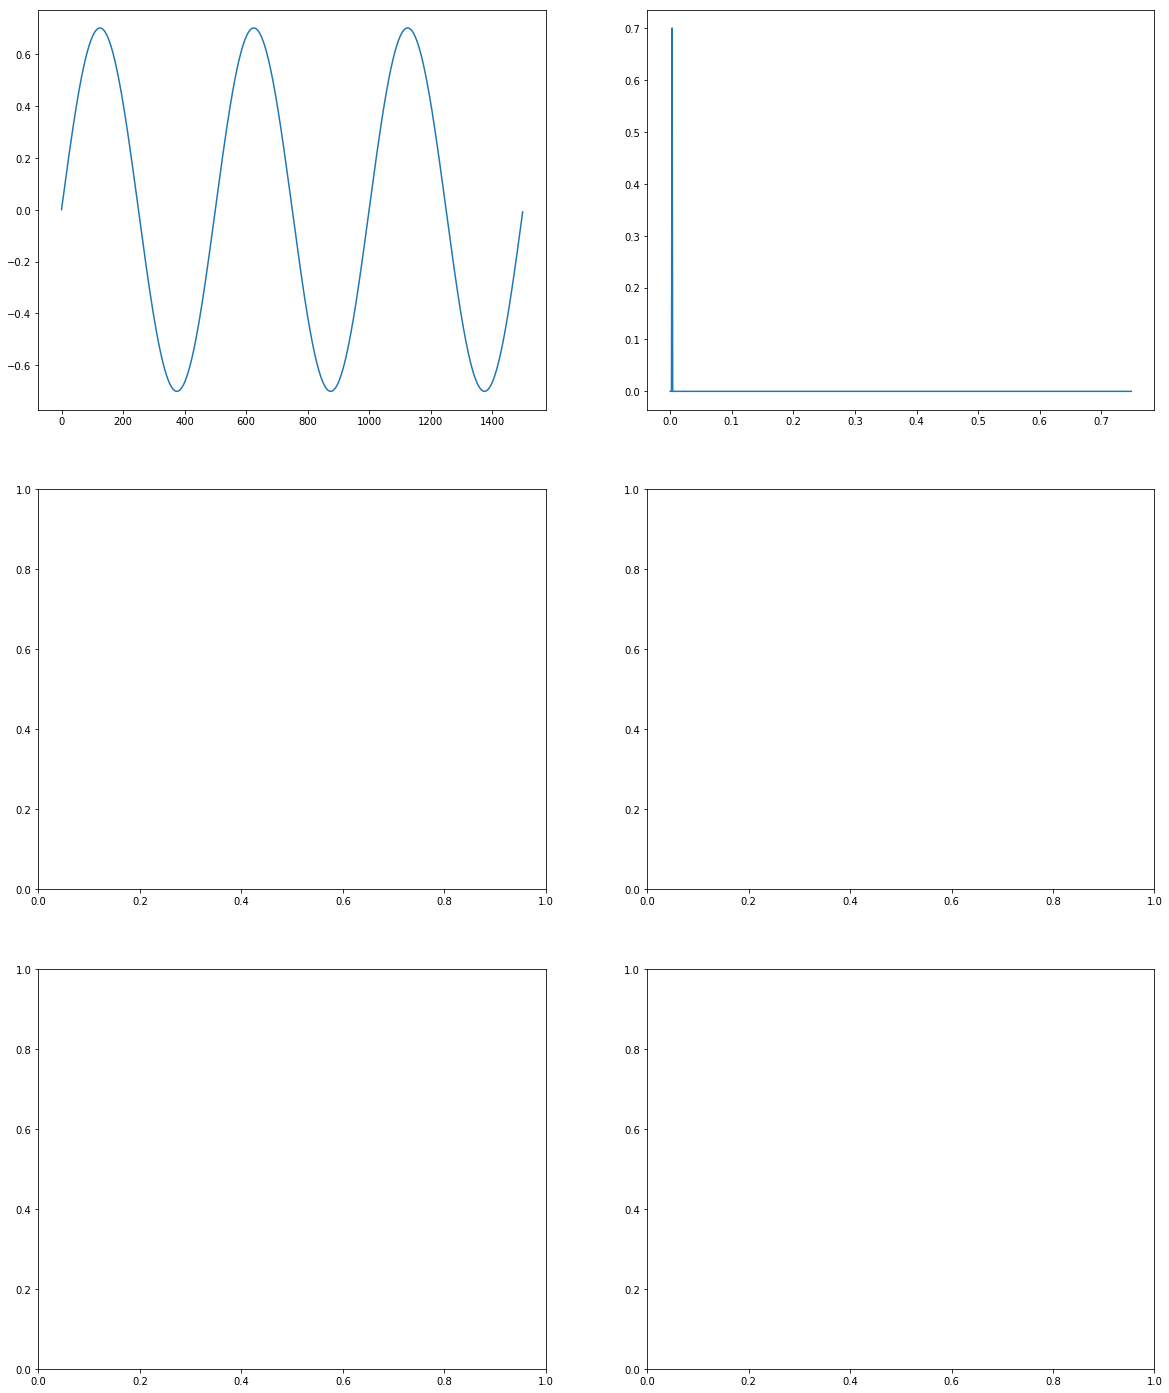

In [165]:
from scipy.fftpack import fft, ifft
from scipy import signal
from scipy.signal import fftconvolve
from scipy.fftpack import fft

fig,ax = plt.subplots(3,2)
fig.set_size_inches(20,25)

Fs = 1000.0            # Sampling frequency                    
T = 1.0/Fs             # Sampling period       
L = 1500             # Length of signal
t = np.arange(0,(L)*T,T)        # Time vector

S = 0.7*np.sin(2*np.pi*2*t)
ax[0,0].plot(S)

yf = fft(S)
xf = np.linspace(0.0, 1.0/(2.0*T), int(L/2))
ax[0,1].plot(t[:L//2], 2.0/L * np.abs(yf[:L//2]))

Tc = 30
comb = np.tile(unit_impulse(Tc),L//Tc)
ax[1,0].stem(t,comb)

combfft = Tc*fft(comb)/L
ax[1,1].stem(t,np.abs(combfft))

ax[2,0].plot(S*comb)

conv = np.convolve(yf,combfft,mode='same')
# y = np.zeros(L)
# y[0:9] = np.abs(conv[0:9])
# iconv = ifft(y)
ax[2,1].plot(t, 2.0/L * np.abs(conv))

## Sampling High Frequency Signal

<img src="snapshots/31.png" />  

Notice the aliasing below

In [ ]:
fig,ax = plt.subplots(3,2)
fig.set_size_inches(20,25)
S = 0.7*np.sin(70*np.pi*2*t) +  0.7*np.sin(5*np.pi*2*t)
ax[0,0].plot(S)
yf = fft(S)
xf = np.linspace(0.0, 1.0/(2.0*T), int(L/2))
ax[0,1].plot(t[:L//2], 2.0/L * np.abs(yf[:L//2]))
ax[1,0].stem(t,comb)
ax[1,1].stem(t,np.abs(combfft))
ax[2,0].plot(S*comb)
conv = np.convolve(yf,combfft,mode='same')
ax[2,1].plot(t[L//2-100:L//2+100], 2.0/L * np.abs(conv[L//2-100:L//2+100]))

**So to fix, we can filter the high frequency, so we don't get an overlab**

<img src="snapshots/32.png" />  

In [ ]:
### This is from 
### https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise (ValueError, "Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [ ]:
swindow = 101
fig,ax = plt.subplots(4,2)
fig.set_size_inches(20,25)
S = 0.7*np.sin(70*np.pi*2*t) +  0.7*np.sin(5*np.pi*2*t)
ax[0,0].plot(S)
yf = fft(S)
xf = np.linspace(0.0, 1.0/(2.0*T), int(L/2))
ax[0,1].plot(t[:L//2], 2.0/L * np.abs(yf[:L//2]))
S = smooth(S,swindow)[swindow-1:-swindow]
ax[1,0].plot(S)
yf = fft(S)
xf = np.linspace(0.0, 1.0/(2.0*T), int(L/2))
ax[1,1].plot(t[:L//2], 2.0/L * np.abs(yf[:L//2]))
ax[2,0].stem(t,comb)
ax[2,1].stem(t,np.abs(combfft))
ax[3,0].plot(S*comb[:-swindow])
conv = np.convolve(yf,combfft[:-swindow],mode='same')
ax[3,1].plot(t[L//2-100:L//2+100], 2.0/L * np.abs(conv[L//2-100:L//2+100]))

## Aliasing in Images

<img src="snapshots/aliasing.png" />

## Image half-sizing

Suppose the below image is too big to fit on the screen...
- How can we reduce it e.g. generate a half-sized version?

<img src="snapshots/aliasing2.png" />


One solution is **Image Sub-sampling**. 

Throw away every other raw and column to create a 1/2 size image - called image sub-sampling

In [ ]:
imshow(messi)
imshow(messi[::2,::2])
imshow(messi[::4,::4])
imshow(messi[::8,::8])

In [ ]:
## To see how bad subsampling is. The effect of aliasing
imshow(messi)
imshow(resize(messi[::2,::2],(messi.shape[1],messi.shape[0])))
imshow(resize(messi[::4,::4],(messi.shape[1],messi.shape[0])))
imshow(resize(messi[::8,::8],(messi.shape[1],messi.shape[0])))

## Gaussian (lowpass) pre-filtering

Filter the image and then subsample

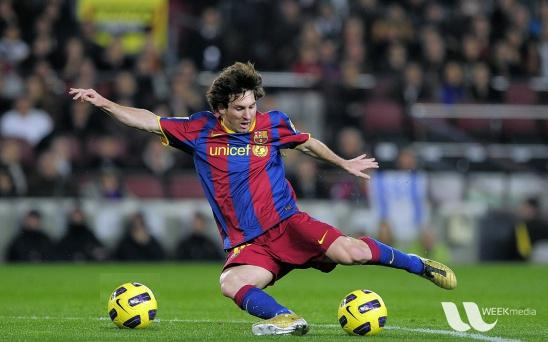

Subsampling without antialiasing


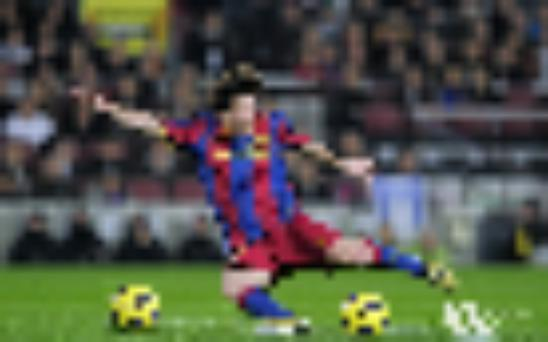

Subsampling after antialiasing


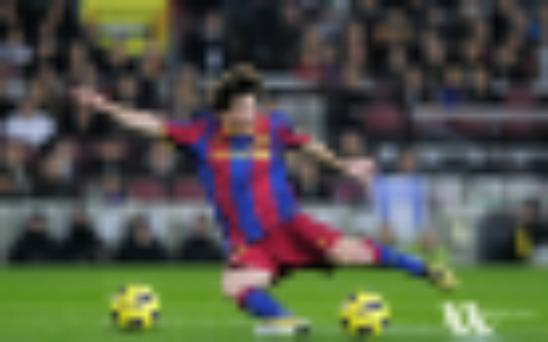

In [166]:
from skimage.filters import gaussian as gaussian_filter
gmessi = normalize_img(gaussian_filter(messi, sigma=2,multichannel=True)).astype(np.uint8)
imshow(messi)
print("Subsampling without antialiasing")
imshow(resize(messi[::8,::8],(messi.shape[1],messi.shape[0])))
print("Subsampling after antialiasing")
imshow(resize(gmessi[::8,::8],(gmessi.shape[1],gmessi.shape[0])))

# <font color='red'>  🤩🎩👏🏻 Magic. I hope Messi shows us some of his ultra-magic when playing Tottenham in Wembley in two days 🤩🎩👏🏻</font>

